# Datawhale 智慧海洋建设-Task3 特征工程

此部分为智慧海洋建设竞赛的特征工程模块，通过特征工程，可以最大限度地从原始数据中提取特征以供算法和模型使用。通俗而言，就是通过X，创造新的X'以获得更好的训练、预测效果。

“数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已”——机器学习界；

类似的，吴恩达曾说过：“特征工程不仅操作困难、耗时，而且需要专业领域知识。应用机器学习基本上就是特征工程。”


赛题：智慧海洋建设

特征工程的目的:

- 特征工程是一个包含内容很多的主题，也被认为是成功应用机器学习的一个很重要的环节。如何充分利用数据进行预测建模就是特征工程要解决的问题！ “实际上，所有机器学习算法的成功取决于如何呈现数据。” “特征工程是一个看起来不值得在任何论文或者书籍中被探讨的一个主题。但是他却对机器学习的成功与否起着至关重要的作用。机器学习算法很多都是由于建立一个学习器能够理解的工程化特征而获得成功的。”——ScottLocklin，in “Neglected machine learning ideas”


- 数据中的特征对预测的模型和获得的结果有着直接的影响。可以这样认为，特征选择和准备越好，获得的结果也就越好。这是正确的，但也存在误导。预测的结果其实取决于许多相关的属性：比如说能获得的数据、准备好的特征以及模型的选择。


- 上分！:) 毫不夸张的说在基本的数据挖掘类比赛中，特征工程就是你和topline的距离。

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/wisdomOcean


比赛地址：https://tianchi.aliyun.com/competition/entrance/231768/introduction?spm=5176.12281957.1004.8.4ac63eafE1rwsY

## 学习目标

1. 学习特征工程的基本概念


2. 学习topline代码的特征工程构造方法，实现构建有意义的特征工程


3. 完成相应学习打卡任务

## 内容介绍

0. 特征工程概述

1. 赛题特征工程
    - 业务特征，根据先验知识进行专业性的特征构建
2. 分箱特征
    - v、x、y的分箱特征
    - x、y分箱后并构造区域
3. DataFramte特征
    - count计数值
    - shift偏移量
    - 统计特征
4. Embedding特征
    - Word2vec构造词向量
    - NMF提取文本的主题分布
5. 总结

# 特征工程概述

特征工程大体可分为3部分，特征构建、特征提取和特征选择。

- 特征构建

“从数学的角度讲，特征工程就是将原始数据空间变换到新的特征空间，或者说是换一种数据的表达方式，在新的特征空间中，模型能够更好地学习数据中的规律。因此，特征抽取就是对原始数据进行变换的过程。大多数模型和算法都要求输入是维度相同的实向量，因此特征工程首先需要将原始数据转化为实向量。”
其主要包含内容有：

    + 探索性数据分析
    + 数值特征
    + 类别特征
    + 时间特征
    + 文本特征

- 特征提取和特征选择

特征提取和特征选择概念上来说很像，其实特征提取指的是通过特征转换得到一组具有明显物理或统计意义的特征。而特征选择就是在特征集里直接挑出具有明显物理或统计意义的特征。

与特征提取是从原始数据中构造新的特征不同，特征选择是从这些特征集合中选出一个子集。特征选择对于机器学习应用来说非常重要。特征选择也称为属性选择或变量选择，是指为了构建模型而选择相关特征子集的过程。特征选择的目的有如下三个。

    + 简化模型，使模型更易于研究人员和用户理解。可解释性不仅让我们对模型效果的稳定性有更多的把握，而且也能为业务运营等工作提供指引和决策支持。

    +  改善性能。特征选择的另一个作用是节省存储和计算开销。

    +  改善通用性、降低过拟合风险。特征的增多会大大增加模型的搜索空间，大多数模型所需要的训练样本数目随着特征数量的增加而显著增加，特征的增加虽然能更好地拟合训练数据，但也可能增加方差。

————————————————————————————————————————————————————————————————————

注：本ipynb着重学习topline代码的特征工程构造方法，效果需要模型方面进行预测打分

————————————————————————————————————————————————————————————————————

导入所需库和数据

补充：
下述库中的geopandas安装可能会遇到问题，可通过如下博客解决：

https://qianni1997.github.io/2019/07/26/geopandas-install/

In [1]:
import gc
import multiprocessing as mp
import os
import pickle
import time
import warnings
from collections import Counter
from copy import deepcopy
from datetime import datetime
from functools import partial
from glob import glob

import geopandas as gpd
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from gensim.models import FastText, Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from pyproj import Proj
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

os.environ['PYTHONHASHSEED'] = '0'  #这个小有学问 没看懂
warnings.filterwarnings('ignore')

F:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# 不直接对DataFrame做append操作，提升运行速度  
# apped 方法 小有学问  计算机内存是开辟一块差不多内存大小存储 list，当内存超过界限 是重新开辟一块更大内存，把这里内存里的值copy过去，
# 而底层的c语言的内存优化，他是开辟一块小内存空间 把这块内存地址接上那一块不够用的内存，
# 字典也可以加速 task2 把他弄成了一个字典
def get_data(file_path,max_lines = 2000):
    paths = os.listdir(file_path)   # task2中 生成一个 该文件夹下所有csv 文件的 list
    tmp = []
    for t in tqdm(range(len(paths))):
        if len(tmp) > max_lines:break
            
        p = paths[t]
        #字符串{}里面传入可转义变量 而不是当作字符串处理 format(file_path, p)
        with open('{}/{}'.format(file_path, p), encoding='utf-8') as f:  
            next(f)  # 迭代器 循环打开下一个文件  
            for line in f.readlines():  # 一行一行读取
                tmp.append(line.strip().split(','))  # csv文件逗号为分割符
                if len(tmp) > max_lines:break   #如果这一行长度大于2000，跳出迭代器？
                    
    tmp_df = pd.DataFrame(tmp)
    tmp_df.columns = ['渔船ID', 'x', 'y', '速度', '方向', 'time', 'type']
    return tmp_df

TRAIN_PATH = "./数据集/hy_round1_train_20200102/"
# 采样数据行数
max_lines = 2000
df = get_data(TRAIN_PATH,max_lines=max_lines)

  0%|                                                                                | 6/7000 [00:00<00:33, 207.45it/s]


In [3]:
df

,渔船ID,x,y,速度,方向,time,type
0,0,6152038.425152995,5124873.382791501,2.59,102,1110 11:58:19,拖网
1,0,6151229.51049325,5125218.014930881,2.7,113,1110 11:48:19,拖网
2,0,6150420.63814009,5125562.714862415,2.7,116,1110 11:38:19,拖网
3,0,6149611.808115767,5125907.482580221,3.29,95,1110 11:28:19,拖网
4,0,6148803.020442532,5126252.318078417,3.18,108,1110 11:18:19,拖网
...,...,...,...,...,...,...,...
1996,1001,6246323.396197493,5241153.82934049,0.11,0,1117 09:43:41,拖网
1997,1001,6246323.396197493,5241153.82934049,0.22,10,1117 09:34:10,拖网
1998,1001,6246323.396197493,5241153.82934049,0.11,0,1117 09:23:39,拖网
1999,1001,6246323.396197493,5241153.82934049,0.11,287,1117 09:13:40,拖网


In [4]:
# paths=os.listdir(TRAIN_PATH)[0:1] #paths=os.listdir(TRAIN_PATH)[0]  不是列表list  [] 后续迭代代码会报错

In [5]:
# paths

In [6]:
# file_path = "./数据集/hy_round1_train_20200102"
# tmp = []
# for t in tqdm(range(len(paths))):
#     if len(tmp) > max_lines:break

#     p = paths[t]
#     #字符串{}里面传入可转义变量 而不是当作字符串处理 format(file_path, p)
#     with open('{}/{}'.format(file_path, p), encoding='utf-8') as f:  
#         next(f)  # 迭代器 循环打开下一个文件  
#         print(f)
#         for line in f.readlines():  # 一行一行读取
#             tmp.append(line.strip().split(','))  # csv文件逗号为分割符
#             if len(tmp) > max_lines:break   #如果这一行长度大于2000，跳出迭代器？

In [7]:
# paths

In [8]:
# tmp  # 全是ID 为0的

In [9]:
# 基本预处理
label_dict1 = {'拖网': 0, '围网': 1, '刺网': 2}
label_dict2 = {0: '拖网', 1: '围网', 2: '刺网'}
name_dict = {'渔船ID': 'id', '速度': 'v', '方向': 'dir', 'type': 'label'}

df.rename(columns = name_dict, inplace = True)  #重命名
# 匹配替换掉 label_dict1 = {'拖网': 0, '围网': 1, '刺网': 2} 拖网换成0，围网换成1，刺网换成2
df['label'] = df['label'].map(label_dict1)  
cols = ['x','y','v']
for col in cols:
    df[col] = df[col].astype('float')
df['dir'] = df['dir'].astype('int')
df['time'] = pd.to_datetime(df['time'], format='%m%d %H:%M:%S')   # 1110 11:58:19 自动自配 修改 匹配形式是月份 日期 
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['weekday'] = df['time'].dt.weekday
df.head()

,id,x,y,v,dir,time,label,date,hour,month,weekday
0,0,6.152038e+06,5.124873e+06,2.59,102,1900-11-10 11:58:19,0,1900-11-10,11,11,5
1,0,6.151230e+06,5.125218e+06,2.70,113,1900-11-10 11:48:19,0,1900-11-10,11,11,5
2,0,6.150421e+06,5.125563e+06,2.70,116,1900-11-10 11:38:19,0,1900-11-10,11,11,5
3,0,6.149612e+06,5.125907e+06,3.29,95,1900-11-10 11:28:19,0,1900-11-10,11,11,5
4,0,6.148803e+06,5.126252e+06,3.18,108,1900-11-10 11:18:19,0,1900-11-10,11,11,5


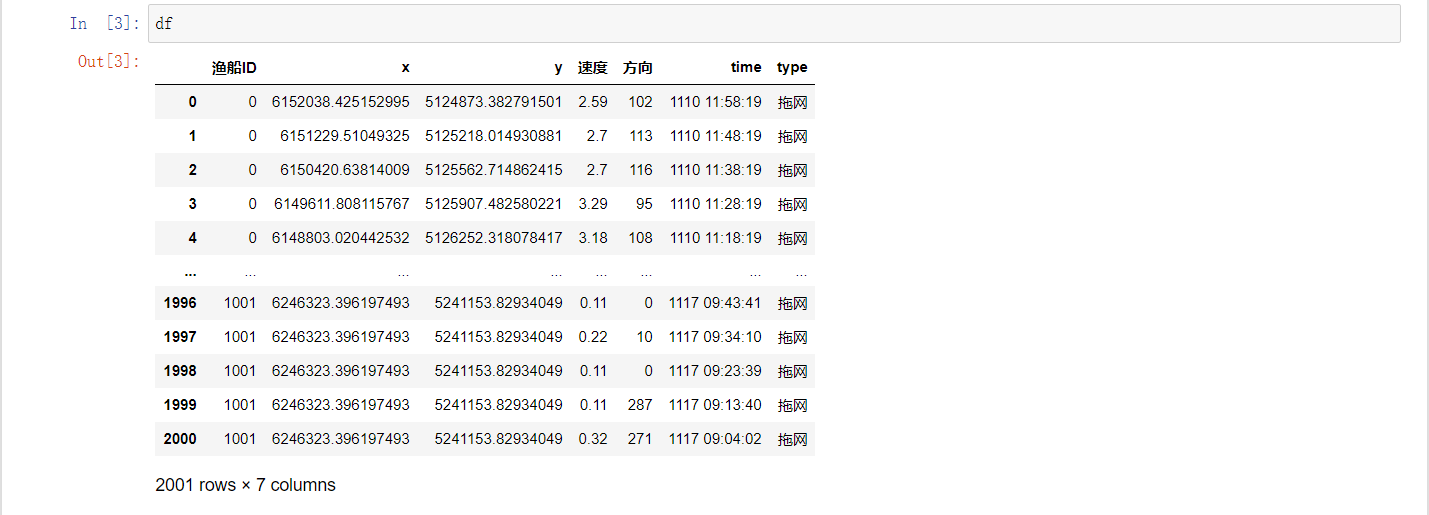

数据说明：

    - id：渔船ID，整数
    - x：记录位置横坐标，浮点数
    - y：记录位置纵坐标，浮点数
    - v：记录速度，浮点数
    - dir：记录航向，整数
    - time：时间，文本
    - label：需要预测的标签，整数

# 赛题特征工程

## 构造各点的(x、y)坐标与特定点(6165599,5202660)的距离

In [10]:
df['x_dis_diff'] = (df['x'] - 6165599).abs() #绝对值
df['y_dis_diff'] = (df['y'] - 5202660).abs()
df['base_dis_diff'] = ((df['x_dis_diff']**2)+(df['y_dis_diff']**2))**0.5    # 欧氏距离
del df['x_dis_diff'],df['y_dis_diff']  #删除本人都是drop 这次学废了
df['base_dis_diff'].head()

0    78959.780945
1    78763.845006
2    78577.185266
3    78399.867568
4    78231.955018
Name: base_dis_diff, dtype: float64

In [11]:
df.describe()

,x,y,v,dir,label,hour,month,weekday,base_dis_diff
count,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,6.274015e+06,5.200368e+06,1.628751,97.679160,0.188406,11.516242,10.794603,3.056472,221307.251750
std,2.648292e+05,1.407043e+05,2.316056,112.819081,0.391134,6.951968,0.404093,1.904025,229556.033818
min,6.049472e+06,5.042857e+06,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,77596.193923
25%,6.113272e+06,5.112534e+06,0.000000,0.000000,0.000000,5.000000,11.000000,1.000000,89107.754859
50%,6.124951e+06,5.130672e+06,0.220000,50.000000,0.000000,11.000000,11.000000,3.000000,109875.392407
75%,6.246219e+06,5.240937e+06,3.350000,193.000000,0.000000,18.000000,11.000000,4.000000,170848.807418
max,6.844414e+06,5.540087e+06,10.470000,359.000000,1.000000,23.000000,11.000000,6.000000,733417.880395


## 对时间，小时进行白天、黑天进行划分，5-20为白天1，其余为黑天0

In [12]:
df['day_nig'] = 0
df.loc[(df['hour'] > 5) & (df['hour'] < 20),'day_nig'] = 1
df['day_nig'].head()

0    1
1    1
2    1
3    1
4    1
Name: day_nig, dtype: int64

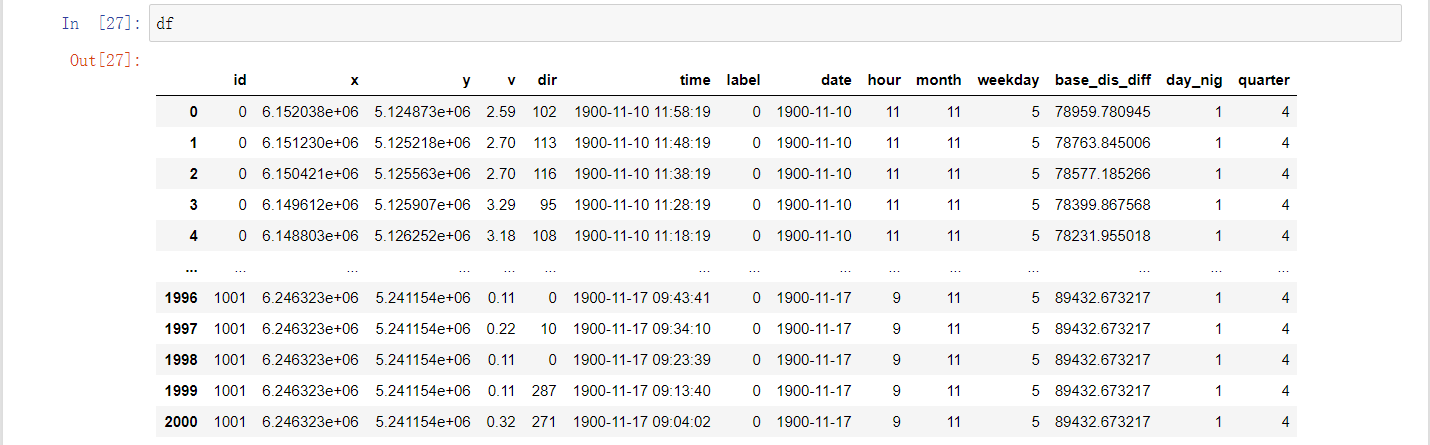

## 根据月份划分季度

In [13]:
# 季度
# https://blog.csdn.net/lzw2016/article/details/80472649  这份isin函数挺有用的
df['quarter'] = 0
df.loc[(df['month'].isin([1, 2, 3])), 'quarter'] = 1
df.loc[(df['month'].isin([4, 5, 6, ])), 'quarter'] = 2
df.loc[(df['month'].isin([7, 8, 9])), 'quarter'] = 3
df.loc[(df['month'].isin([10, 11, 12])), 'quarter'] = 4

## 动态速度，速度变化，角度变化，xy相似性等特征

In [14]:
temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字

# 给速度一个等级  疑惑为什么这样划分等级
def v_cut(v):
    if v < 0.1:
        return 0
    elif v < 0.5:
        return 1
    elif v < 1:
        return 2
    elif v < 2.5:
        return 3
    elif v < 5:
        return 4
    elif v < 10:
        return 5
    elif v < 20:
        return 5
    else:
        return 6
# 统计每个ship的对应速度等级的个数
def get_v_fea(df):

    df['v_cut'] = df['v'].apply(lambda x: v_cut(x))
    #   https://zhuanlan.zhihu.com/p/109820274
    tmp = df.groupby(['ship', 'v_cut'], as_index=False)['v_cut'].agg({'v_cut_count': 'count'})   # 索引排序 0 1 2 3
    # 通过pivot构建透视表   https://blog.csdn.net/weixin_38569817/article/details/90444204 
    tmp = tmp.pivot(index='ship', columns='v_cut', values='v_cut_count')

    new_col_nm = ['v_cut_' + str(col) for col in tmp.columns.tolist()]
    tmp.columns = new_col_nm  
    tmp = tmp.reset_index()  # 把index恢复成data

    return tmp

c1 = get_v_fea(temp)

In [15]:
# df

In [16]:
# temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
# temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字
# temp['v_cut'] = temp['v'].apply(lambda x: v_cut(x))
# temp.head()

In [17]:
# temp["ship"].unique()  #只有5搜船  感觉就很奇怪??wc,假的吧 

In [18]:
# # 索引排序 0 1 2 3  count带特殊函义 是一个特殊参数
# tmp = temp.groupby(['ship', 'v_cut'], as_index=False)['v_cut'].agg({'v_cut_count': 'count'})   
# tmp  # 一艘船有5个速度挡  

In [19]:
# tmp['v_cut_count'].sum()  #  这个挡位有多少个  task2中是构造字典计数unique count  不过他这个他是把所有数据已经划分等级挡位了

```python
tmp = tmp.pivot(index=['ship'], columns=['v_cut'], values=['v_cut_count'])  # NaNs说明他根本没有这一档
# tmp = tmp.pivot(index='ship', columns='v_cut', values='v_cut_count')  # NaNs说明他根本没有这一档
tmp
```
加上[ ]会有错 结果不一样,加上后 如下图所示
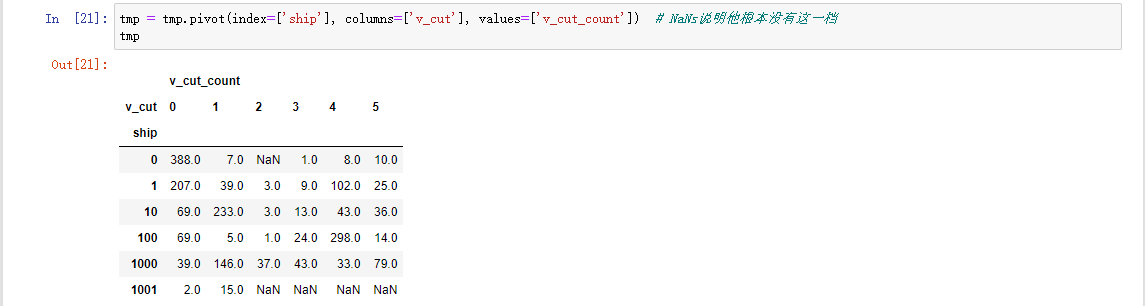

In [20]:
# # https://blog.csdn.net/weixin_38569817/article/details/90444204
# tmp = tmp.pivot(index='ship', columns='v_cut', values='v_cut_count')  # NaNs说明他根本没有这一档
# tmp

In [21]:
# for col in tmp.columns.tolist():
#     print(col)

In [22]:
# new_col_nm = ['v_cut_' + str(col) for col in tmp.columns.tolist()]
# tmp.columns = new_col_nm  # 把index恢复成data  加索引
# tmp = tmp.reset_index()  # 把index恢复成data

In [23]:
# new_col_nm

In [24]:
# tmp

In [25]:
# c1

In [26]:
# # 因为上一个速度函数 temp 使用了temp 且修改里面的值了  所以重新初始化执行
# temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
# temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字
# temp

In [27]:
# 方位进行16均分   与上一个函数  速度  是等同的
def add_direction(df):
    df['d16'] = df['d'].apply(lambda x: int((x / 22.5) + 0.5) % 16 if not np.isnan(x) else np.nan)
    return df
def get_d_cut_count_fea(df):
    df = add_direction(df)
     # https://zhuanlan.zhihu.com/p/109820274
    tmp = df.groupby(['ship', 'd16'], as_index=False)['d16'].agg({'d16_count': 'count'})
    tmp = tmp.pivot(index='ship', columns='d16', values='d16_count')
    new_col_nm = ['d16_' + str(col) for col in tmp.columns.tolist()]
    tmp.columns = new_col_nm
    tmp = tmp.reset_index()
    return tmp

c2 = get_d_cut_count_fea(temp)

In [28]:
# temp = add_direction(temp)
# temp

In [29]:
# tmp = temp.groupby(['ship', 'd16'], as_index=False)['d16'].agg({'d16_count': 'count'})   #分组且分档
# tmp

In [30]:
# c2

In [31]:
# # 因为上一个方向函数 temp 使用了temp 且修改里面的值了  所以重新初始化执行
# temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
# temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字
# temp.head()

In [32]:
# 也是分等级 mean min max....
def get_v0_fea(df):
    # 统计速度为0的个数，以及速度不为0的统计量
    # df[df["列名"] =="条件"] 等价于 df.query("列名 == '条件'") 可以当作一个判定条件大于小于
    # https://zhuanlan.zhihu.com/p/52001346
    df_zero_count = df.query("v==0")[['ship', 'v']].groupby('ship', as_index=False)['v'].agg(
        {'num_zero_v': 'count'})
    df_not_zero_agg = df.query("v!=0")[['ship', 'v']].groupby('ship', as_index=False)['v'].agg(
        {'v_max_drop_0': 'max',
         'v_min_drop_0': 'min',
         'v_mean_drop_0': 'mean',
         'v_std_drop_0': 'std',
         'v_median_drop_0': 'median',
         'v_skew_drop_0': 'skew'})
    tmp = df_zero_count.merge(df_not_zero_agg, on='ship', how='left')

    return tmp

c3 = get_v0_fea(temp)

In [33]:
# 把所有速度为0的船取出来分组  统计
df_zero_count = temp.query("v==0")[['ship', 'v']].groupby('ship', as_index=False)['v'].agg({'num_zero_v': 'count'})
df_zero_count

,ship,num_zero_v
0,0,369
1,1,131
2,10,69
3,100,60
4,1000,39
5,1001,2


In [34]:
# df_not_zero_agg = temp.query("v!=0")[['ship', 'v']].groupby('ship', as_index=False)['v'].agg(
#         {'v_max_drop_0': 'max',
#          'v_min_drop_0': 'min',
#          'v_mean_drop_0': 'mean',
#          'v_std_drop_0': 'std',
#          'v_median_drop_0': 'median',
#          #偏度（skewness），是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。偏度(Skewness)亦称偏态、偏态系数。
#          'v_skew_drop_0': 'skew'})
# df_not_zero_agg

In [35]:
# tmp = df_zero_count.merge(df_not_zero_agg, on='ship', how='left')  #合并两张表
# tmp

In [36]:
# c3

In [37]:
# [0.05, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 0.95] 描述这些数  
# 相当于df.describe(),['x', 'y', 'v', 'd']  然后合并进原来的表
def get_percentiles_fea(df_raw):
    key = ['x', 'y', 'v', 'd']
    # https://zhuanlan.zhihu.com/p/116884554  去重 索引被删 造成间断
    temp = df_raw[['ship']].drop_duplicates('ship')
    for i in range(len(key)):
        # 加入x，v，d，y的中位数和各种位数
        tmp_dscb = df_raw.groupby('ship')[key[i]].describe(
            percentiles=[0.05] + [ii / 1000 for ii in range(125, 1000, 125)] + [0.95])
        raw_col_nm = tmp_dscb.columns.tolist()
        new_col_nm = [key[i] + '_' + col for col in raw_col_nm]
        tmp_dscb.columns = new_col_nm
        tmp_dscb = tmp_dscb.reset_index()
        # 删掉多余的统计特征
        tmp_dscb = tmp_dscb.drop([f'{key[i]}_count', f'{key[i]}_mean', f'{key[i]}_std',
                                  f'{key[i]}_min', f'{key[i]}_max'], axis=1)

        temp = temp.merge(tmp_dscb, on='ship', how='left')
    return temp

c4 = get_percentiles_fea(temp)

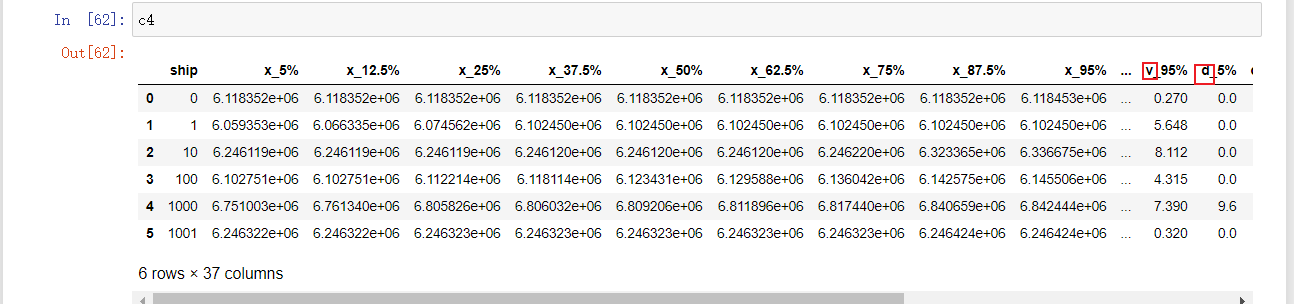

In [38]:
# # 因为上一个方向函数 temp 使用了temp 且修改里面的值了  所以重新初始化执行
# temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
# temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字
# temp.head()

In [39]:
# df_raw=temp
# key = ['x', 'y', 'v', 'd']
# temp = df_raw[['ship']].drop_duplicates('ship')  
# temp

In [40]:
# for i in range(len(key)):
#     # 加入x，v，d，y的中位数和各种位数
#     #  # [0.05, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 0.95] 描述这些数
#     tmp_dscb = df_raw.groupby('ship')[key[i]].describe(
#         percentiles=[0.05] + [ii / 1000 for ii in range(125, 1000, 125)] + [0.95])  
#     raw_col_nm = tmp_dscb.columns.tolist()
#     new_col_nm = [key[i] + '_' + col for col in raw_col_nm]
#     tmp_dscb.columns = new_col_nm
#     tmp_dscb = tmp_dscb.reset_index()
#     # 删掉多余的统计特征
#     tmp_dscb = tmp_dscb.drop([f'{key[i]}_count', f'{key[i]}_mean', f'{key[i]}_std',
#                               f'{key[i]}_min', f'{key[i]}_max'], axis=1)
#     temp = temp.merge(tmp_dscb, on='ship', how='left')

In [41]:
# tmp_dscb = df_raw.groupby('ship')[key[0]].describe()
# tmp_dscb

In [42]:
# percentiles=[0.05] + [ii / 1000 for ii in range(125, 1000, 125)] + [0.95]
# percentiles

In [43]:
# tmp_dscb = df_raw.groupby('ship')[key[0]].describe(  #这是 x坐标的
#     percentiles=[0.05] + [ii / 1000 for ii in range(125, 1000, 125)] + [0.95])
# tmp_dscb 

In [44]:
# raw_col_nm = tmp_dscb.columns.tolist()
# raw_col_nm

In [45]:
# new_col_nm

In [46]:
# tmp_dscb.columns

In [47]:
# tmp_dscb

In [48]:
# temp.columns

In [49]:
# c4

In [50]:
# # 因为上一个describe函数 temp 使用了temp 且修改里面的值了  所以重新初始化执行
# temp = df.copy()   #重点temp = df.copy()  是重新开辟一块内存空间一样的,而temp = df.只是把df地址赋值过去,对temp的修改也是对df的修改
# temp.rename(columns={'id':'ship','dir':'d'},inplace=True)  #换名字
# temp

In [51]:
def get_d_change_rate_fea(df):
    import math
    import time
    temp = df.copy()
    # 以ship、time为主键进行排序
    temp.sort_values(['ship', 'time'], ascending=True, inplace=True)
    # 通过shift求相邻差异值，注意学习.shift(-1,1)的含义
    # https://www.cnblogs.com/anovana/p/10429284.html
    temp['timenext'] = temp.groupby('ship')['time'].shift(-1)  # 注意time填充的是NaT  # 偏移是按ID 每个ID都偏移  所以NaN有6个
    temp['ynext'] = temp.groupby('ship')['y'].shift(-1)        # 会出现NaN            # 偏移是按ID 每个ID都偏移  所以NaN有6个
    temp['xnext'] = temp.groupby('ship')['x'].shift(-1)        # 会出现NaN            # 偏移是按ID 每个ID都偏移  所以NaN有6个
    # 将shift得到的差异量进行填充，为什么会有空值NaN？
    # 因为shift的起始位置是没法比较的，故用空值来代替   ？
    temp['ynext'] = temp['ynext'].fillna(method='ffill')       # 插值 task1 中一样的  bfill:向前填充
    temp['xnext'] = temp['xnext'].fillna(method='ffill')       # 插值 task1 中一样的  ffill:向后填充
    # 这里笔者的理解是ynext/xnext，而不需要减去y和x，因为ynext和xnext本身就是偏移量了
    temp['angle_next'] = (temp['ynext'] - temp['y']) / (temp['xnext'] - temp['x'])
    temp['angle_next'] = np.arctan(temp['angle_next']) / math.pi * 180  # 多少度
    temp['angle_next_next'] = temp['angle_next'].shift(-1)     # 会出现NaN 偏移
    temp['timediff'] = np.abs(temp['timenext'] - temp['time']) # 时间偏移后的差异绝对值 为下面的 角度差/时间差=w
    temp['timediff'] = temp['timediff'].fillna(method='ffill')  # ffill:向后填充
    temp['hc_xy'] = abs(temp['angle_next_next'] - temp['angle_next'])   # 角度偏移的绝对值
    # 对于hc_xy这列的值>180度的，进行修改成360度求差，仅考虑与水平线的角度  可以使用query匹配  
    # 有点像时间序列分析二阶差分 
    temp.loc[temp['hc_xy'] > 180, 'hc_xy'] = (360 - temp.loc[temp['hc_xy'] > 180, 'hc_xy'])
    temp['hc_xy_s'] = temp.apply(lambda x: x['hc_xy'] / x['timediff'].total_seconds(), axis=1)   #求w 转角速度

    temp['d_next'] = temp.groupby('ship')['d'].shift(-1)
    temp['hc_d'] = abs(temp['d_next'] - temp['d'])
    temp.loc[temp['hc_d'] > 180, 'hc_d'] = 360 - temp.loc[temp['hc_d'] > 180, 'hc_d']
    temp['hc_d_s'] = temp.apply(lambda x: x['hc_d'] / x['timediff'].total_seconds(), axis=1)     #求得是方向随时间变化

    temp1 = temp[['ship', 'hc_xy_s', 'hc_d_s']]
    xy_d_rate = temp1.groupby('ship')['hc_xy_s'].agg([('hc_xy_s_max','max')])  #角度最大值
    xy_d_rate = xy_d_rate.reset_index()
    d_d_rate = temp1.groupby('ship')['hc_d_s'].agg([('hc_d_s_max','max')])    #  方向最大值
    d_d_rate = d_d_rate.reset_index()
   
    tmp = xy_d_rate.merge(d_d_rate, on='ship', how='left')                    # 合并表
    return tmp

c5 = get_d_change_rate_fea(temp)

```
temp.sort_values(['ship', 'time'], ascending=True, inplace=True)   #升序
temp.head()
```
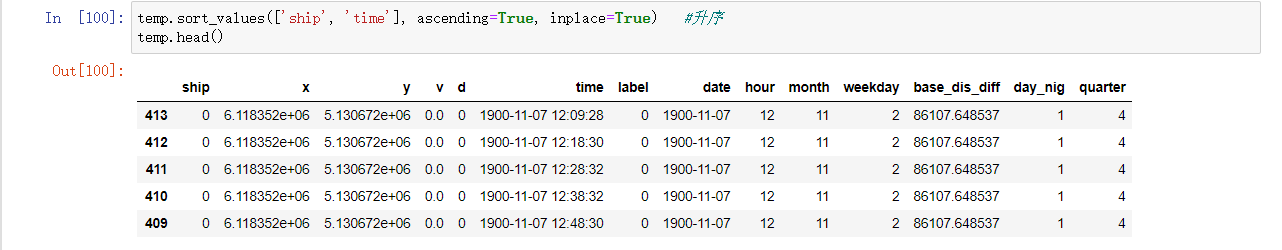

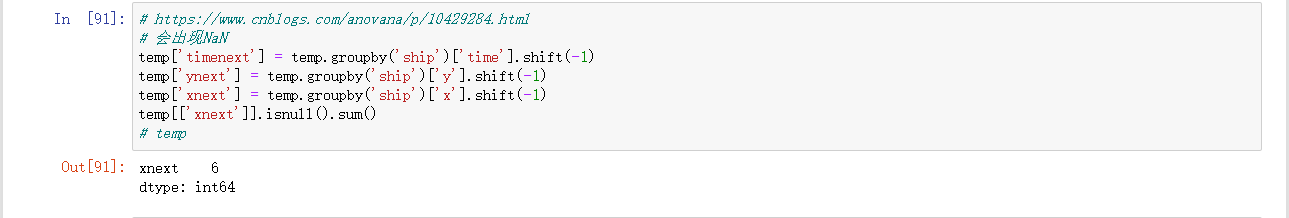

```python
# https://www.cnblogs.com/anovana/p/10429284.html
# 会出现NaN
temp['timenext'] = temp.groupby('ship')['time'].shift(-1)  # 偏移是按ID 每个ID都偏移  所以NaN有6个
temp['ynext'] = temp.groupby('ship')['y'].shift(-1)
temp['xnext'] = temp.groupby('ship')['x'].shift(-1) 
temp.head()
```
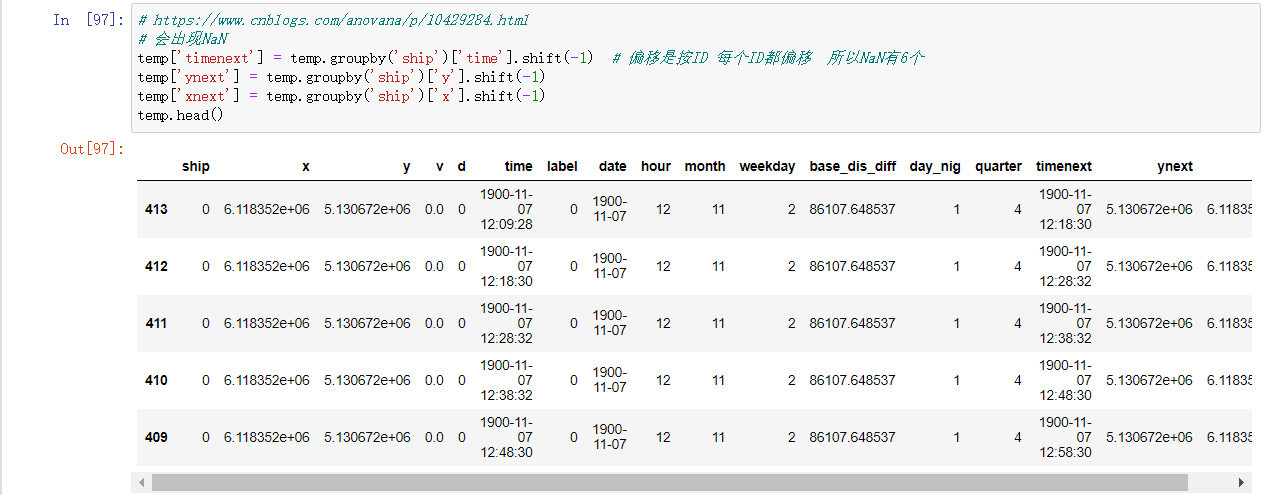

In [52]:
# import math
# import time
# # 以ship、time为主键进行排序
# temp.sort_values(['ship', 'time'], ascending=True, inplace=True)
# # 通过shift求相邻差异值，注意学习.shift(-1,1)的含义
# # https://www.cnblogs.com/anovana/p/10429284.html
# temp['timenext'] = temp.groupby('ship')['time'].shift(-1)  # 注意time填充的是NaT  # 偏移是按ID 每个ID都偏移  所以NaN有6个
# temp['ynext'] = temp.groupby('ship')['y'].shift(-1)        # 会出现NaN            # 偏移是按ID 每个ID都偏移  所以NaN有6个
# temp['xnext'] = temp.groupby('ship')['x'].shift(-1)        # 会出现NaN            # 偏移是按ID 每个ID都偏移  所以NaN有6个
# # 将shift得到的差异量进行填充，为什么会有空值NaN？
# # 因为shift的起始位置是没法比较的，故用空值来代替   ？
# temp['ynext'] = temp['ynext'].fillna(method='ffill')       # 插值 task1 中一样的  bfill:向前填充
# temp['xnext'] = temp['xnext'].fillna(method='ffill')       # 插值 task1 中一样的  ffill:向后填充
# # 这里笔者的理解是ynext/xnext，而不需要减去y和x，因为ynext和xnext本身就是偏移量了
# temp['angle_next'] = (temp['ynext'] - temp['y']) / (temp['xnext'] - temp['x'])
# temp['angle_next'] = np.arctan(temp['angle_next']) / math.pi * 180  # 多少度
# temp['angle_next_next'] = temp['angle_next'].shift(-1)     # 会出现NaN 偏移
# temp['timediff'] = np.abs(temp['timenext'] - temp['time']) # 时间偏移后的差异绝对值 为下面的 角度差/时间差=w
# temp['timediff'] = temp['timediff'].fillna(method='ffill')  # ffill:向后填充
# temp['hc_xy'] = abs(temp['angle_next_next'] - temp['angle_next'])   # 角度偏移的绝对值
# # 对于hc_xy这列的值>180度的，进行修改成360度求差，仅考虑与水平线的角度  可以使用query匹配  
# # 有点像时间序列分析二阶差分 
# temp.loc[temp['hc_xy'] > 180, 'hc_xy'] = (360 - temp.loc[temp['hc_xy'] > 180, 'hc_xy'])
# temp['hc_xy_s'] = temp.apply(lambda x: x['hc_xy'] / x['timediff'].total_seconds(), axis=1)   #求w 转角速度

# temp['d_next'] = temp.groupby('ship')['d'].shift(-1)
# temp['hc_d'] = abs(temp['d_next'] - temp['d'])
# temp.loc[temp['hc_d'] > 180, 'hc_d'] = 360 - temp.loc[temp['hc_d'] > 180, 'hc_d']
# temp['hc_d_s'] = temp.apply(lambda x: x['hc_d'] / x['timediff'].total_seconds(), axis=1)     #求得是方向随时间变化
# temp

In [53]:
# temp1 = temp[['ship', 'hc_xy_s', 'hc_d_s']]
# temp1
# xy_d_rate = temp1.groupby('ship')[
# 'hc_xy_s'].agg({'hc_xy_s_max': 'max',
#                                                 })

In [54]:
# xy_d_rate = temp1.groupby('ship')['hc_xy_s'].agg([('hc_xy_s_max','max')])
# xy_d_rate.reset_index()

In [55]:
# xy_d_rate = temp1.groupby('ship')['hc_xy_s'].agg([('hc_xy_s_max','max')])
# xy_d_rate = xy_d_rate.reset_index()
# d_d_rate = temp1.groupby('ship')['hc_d_s'].agg([('hc_d_s_max','max')])
# d_d_rate = d_d_rate.reset_index()
# d_d_rate

In [56]:
# tmp = xy_d_rate.merge(d_d_rate, on='ship', how='left')
# tmp

In [57]:
# c5

In [58]:
# c1

In [59]:
f1 = temp.merge(c1,on='ship',how='left')
f1 = f1.merge(c2,on='ship',how='left')
f1 = f1.merge(c3,on='ship',how='left')
f1 = f1.merge(c4,on='ship',how='left')
f1 = f1.merge(c5,on='ship',how='left')
f1   # 速度等级 方向等级  等等

,ship,x,y,v,d,time,label,date,hour,month,...,d_12.5%,d_25%,d_37.5%,d_50%,d_62.5%,d_75%,d_87.5%,d_95%,hc_xy_s_max,hc_d_s_max
0,0,6.152038e+06,5.124873e+06,2.59,102,1900-11-10 11:58:19,0,1900-11-10,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183673,0.188020
1,0,6.151230e+06,5.125218e+06,2.70,113,1900-11-10 11:48:19,0,1900-11-10,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183673,0.188020
2,0,6.150421e+06,5.125563e+06,2.70,116,1900-11-10 11:38:19,0,1900-11-10,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183673,0.188020
3,0,6.149612e+06,5.125907e+06,3.29,95,1900-11-10 11:28:19,0,1900-11-10,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183673,0.188020
4,0,6.148803e+06,5.126252e+06,3.18,108,1900-11-10 11:18:19,0,1900-11-10,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183673,0.188020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1001,6.246323e+06,5.241154e+06,0.11,0,1900-11-17 09:43:41,0,1900-11-17,9,11,...,0.0,0.0,10.0,144.0,204.0,271.0,279.0,292.4,0.078424,0.270903
1997,1001,6.246323e+06,5.241154e+06,0.22,10,1900-11-17 09:34:10,0,1900-11-17,9,11,...,0.0,0.0,10.0,144.0,204.0,271.0,279.0,292.4,0.078424,0.270903
1998,1001,6.246323e+06,5.241154e+06,0.11,0,1900-11-17 09:23:39,0,1900-11-17,9,11,...,0.0,0.0,10.0,144.0,204.0,271.0,279.0,292.4,0.078424,0.270903
1999,1001,6.246323e+06,5.241154e+06,0.11,287,1900-11-17 09:13:40,0,1900-11-17,9,11,...,0.0,0.0,10.0,144.0,204.0,271.0,279.0,292.4,0.078424,0.270903


## v、x、y的分箱特征

In [60]:
pre_cols = df.columns

# https://zhuanlan.zhihu.com/p/144234097?from_voters_page=true
# https://blog.csdn.net/qq_37089628/article/details/86501234  
df['v_bin'] = pd.qcut(df['v'], 200, duplicates='drop') # 速度进行 200分位数分箱    drop  range(0, 61)速度按照频率划分等级
df['v_bin'] = df['v_bin'].map(dict(zip(df['v_bin'].unique(), range(df['v_bin'].nunique())))) # 分箱后映射编码
for f in ['x', 'y']:
    df[f + '_bin1'] = pd.qcut(df[f], 1000, duplicates='drop') # x,y位置分箱1000  x按照频率划分等级
    df[f + '_bin1'] = df[f + '_bin1'].map(dict(zip(df[f + '_bin1'].unique(), range(df[f + '_bin1'].nunique()))))#把所有unique的编码  
    df[f + '_bin2'] = df[f] // 10000 # 取整操作
    df[f + '_bin1_count'] = df[f + '_bin1'].map(df[f + '_bin1'].value_counts()) #x,y不同分箱的数量映射   对
    df[f + '_bin2_count'] = df[f + '_bin2'].map(df[f + '_bin2'].value_counts()) #   数量映射   对 
    df[f + '_bin1_id_nunique'] = df.groupby(f + '_bin1')['id'].transform('nunique')#基于分箱1    把所有unique的编码  id数量映射 ID映射到123456
    df[f + '_bin2_id_nunique'] = df.groupby(f + '_bin2')['id'].transform('nunique')#基于分箱2    # 取整操作 id数量映射  
    #  https://www.icode9.com/content-1-493366.html  就是他这个id分组里面有多少个不同的
for i in [1, 2]:
    # 特征交叉x_bin1（2）,y_bin1（2） 形成类别 统计每类数量映射到列  
    df['x_y_bin{}'.format(i)] = df['x_bin{}'.format(i)].astype('str') + '_' + df['y_bin{}'.format(i)].astype('str')
    df['x_y_bin{}'.format(i)] = df['x_y_bin{}'.format(i)].map(
        dict(zip(df['x_y_bin{}'.format(i)].unique(), range(df['x_y_bin{}'.format(i)].nunique())))
    )  # 数量映射编码
    df['x_bin{}_y_bin{}_count'.format(i, i)] = df['x_y_bin{}'.format(i)].map(df['x_y_bin{}'.format(i)].value_counts())  # 数量映射
for stat in ['max', 'min']:
    # 统计x_bin1 y_bin1的最大最小值
    df['x_y_{}'.format(stat)] = df['y'] - df.groupby('x_bin1')['y'].transform(stat)
    df['y_x_{}'.format(stat)] = df['x'] - df.groupby('y_bin1')['x'].transform(stat)

new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols].head()

,v_bin,x_bin1,x_bin2,x_bin1_count,x_bin2_count,x_bin1_id_nunique,x_bin2_id_nunique,y_bin1,y_bin2,y_bin1_count,...,y_bin1_id_nunique,y_bin2_id_nunique,x_y_bin1,x_bin1_y_bin1_count,x_y_bin2,x_bin2_y_bin2_count,x_y_max,y_x_max,x_y_min,y_x_min
0,0.0,0,615.0,116,8,2,2,0,512.0,2,...,2,1,0,1,0,3,-115954.675157,0.000000,0.000000,49790.106760
1,0.0,1,615.0,2,8,2,2,1,512.0,2,...,1,1,1,1,0,3,0.000000,0.000000,53070.048324,808.872353
2,0.0,2,615.0,2,8,2,2,1,512.0,2,...,1,1,2,1,0,3,0.000000,-808.872353,54707.512092,0.000000
3,1.0,3,614.0,2,77,2,2,2,512.0,2,...,1,1,3,1,1,8,0.000000,0.000000,52951.293120,808.787673
4,2.0,4,614.0,2,77,2,2,2,512.0,2,...,1,1,4,1,1,8,0.000000,-808.787673,55461.653028,0.000000


In [61]:
# df

In [62]:
# range(df['v'].nunique())

In [63]:
# # https://blog.csdn.net/qq_37089628/article/details/86501234  
# df['v_bin'] = pd.qcut(df['v'], 200, duplicates='drop') # 速度进行 200分位数分箱    drop  按频率出现的频率
# df['v_bin']

In [64]:
# dict(zip(df['v_bin'].unique(), range(df['v_bin'].nunique())))

In [65]:
# range(df['v_bin'].nunique())

In [66]:
# df['v_bin'].unique()

In [67]:
# df['v_bin'] = df['v_bin'].map(dict(zip(df['v_bin'].unique(), range(df['v_bin'].nunique())))) # 分箱后映射编码
# df['v_bin']

In [68]:
# df[f + '_bin1'] = pd.qcut(df[f], 1000, duplicates='drop') # x,y位置分箱1000  x按照频率划分等级  分不成1000分  
# df[f + '_bin1'] = df[f + '_bin1'].map(dict(zip(df[f + '_bin1'].unique(), range(df[f + '_bin1'].nunique()))))#编码  
# df[f + '_bin2'] = df[f] // 10000 # 取整操作
# df[f + '_bin1_count'] = df[f + '_bin1'].map(df[f + '_bin1'].value_counts()) #x,y不同分箱的数量映射
# df[f + '_bin2_count'] = df[f + '_bin2'].map(df[f + '_bin2'].value_counts()) #数量映射
# df[f + '_bin1_id_nunique'] = df.groupby(f + '_bin1')['id'].transform('nunique')#基于分箱1 id数量映射
# df[f + '_bin2_id_nunique'] = df.groupby(f + '_bin2')['id'].transform('nunique')#基于分箱2 id数量映射

In [69]:
# f='x'
# df[f + '_bin1'] = pd.qcut(df[f], 1000, duplicates='drop') # x,y位置分箱1000  x按照频率划分等级  分成了454   
# df[f + '_bin1'] = df[f + '_bin1'].map(dict(zip(df[f + '_bin1'].unique(), range(df[f + '_bin1'].nunique()))))#编码  
# df[f + '_bin2'] = df[f] // 10000 # 取整操作
# df

In [70]:
# df[f + '_bin1'].value_counts()

In [71]:
# df[f + '_bin1_id_nunique'] = df.groupby(f + '_bin1')['id'].transform('nunique')#基于分箱1 id数量映射
# df[f + '_bin2_id_nunique'] = df.groupby(f + '_bin2')['id'].transform('nunique')#基于分箱2 id数量映射
# df[f + '_bin1_id_nunique']

In [72]:
# df.groupby(f + '_bin2')['id'].apply(lambda x:x)

In [73]:
# df[f].nunique()

In [74]:
# df[f + '_bin1'].nunique()

In [75]:
# df[f + '_bin1'].value_counts()

In [76]:
# df['v_bin']

In [77]:
# f='x'
# df[f + '_bin1'] = pd.qcut(df[f], 1000, duplicates='drop') # x,y位置分箱1000  x按照频率划分等级
# df[f + '_bin1'] = df[f + '_bin1'].map(dict(zip(df[f + '_bin1'].unique(), range(df[f + '_bin1'].nunique()))))#编码  
# df[f + '_bin2'] = df[f] // 10000 # 取整操作
# df[f + '_bin2']

In [78]:
# i =1
# df['x_y_bin{}'.format(i)] = df['x_bin{}'.format(i)].astype('str') + '_' + df['y_bin{}'.format(i)].astype('str')
# df['x_y_bin{}'.format(i)]

In [79]:
# df['x_bin{}_y_bin{}_count'.format(i, i)]

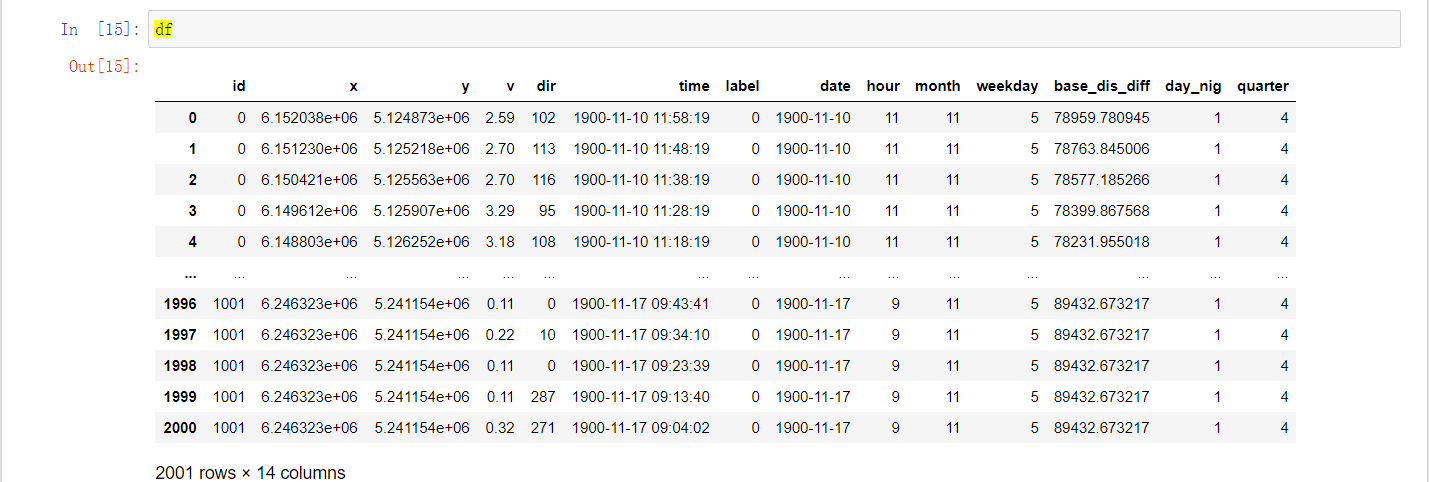

In [80]:
# pre_cols   #确实是之前df说明之前没对df修改

##  将x、y进行分箱并构造区域

In [81]:
def traj_to_bin(traj=None, x_min=12031967.16239096, x_max=14226964.881853,
                y_min=1623579.449434373, y_max=4689471.1780792,
                row_bins=4380, col_bins=3136):

    # Establish bins on x direction and y direction
    x_bins = np.linspace(x_min, x_max, endpoint=True, num=col_bins + 1)  #等差数列  endpoint=True是否包含最后一个
    y_bins = np.linspace(y_min, y_max, endpoint=True, num=row_bins + 1)  #等差数列  endpoint=True是否包含最后一个

    # Determine each x coordinate belong to which bin
    traj.sort_values(by='x', inplace=True)  # 排序
    x_res = np.zeros((len(traj), ))         # array([0., 0., 0., ..., 0., 0., 0.])
    j = 0
    for i in range(1, col_bins + 1):        # 1,2,3,4,5,6,,...,col_bins 
        low, high = x_bins[i-1], x_bins[i]
        while( j < len(traj)):
            # low - 0.001 for numeric stable.
            if (traj["x"].iloc[j] <= high) & (traj["x"].iloc[j] > low - 0.001):  # traj排序后小于他等差
                #  假设有上面那种情况出现 x_res[j] 行= 等差数列中哪一行，要么就是0 因为数据乱套最大值最小值都很大，所以全是0 
                x_res[j] = i   
                j += 1
            else:
                break
    traj["x_grid"] = x_res
    traj["x_grid"] = traj["x_grid"].astype(int)
    traj["x_grid"] = traj["x_grid"].apply(str)

    # Determine each y coordinate belong to which bin
    traj.sort_values(by='y', inplace=True)
    y_res = np.zeros((len(traj), ))
    j = 0
    for i in range(1, row_bins + 1):
        low, high = y_bins[i-1], y_bins[i]
        while( j < len(traj)):
            # low - 0.001 for numeric stable.
            if (traj["y"].iloc[j] <= high) & (traj["y"].iloc[j] > low - 0.001):
                y_res[j] = i
                j += 1
            else:
                break
    traj["y_grid"] = y_res
    traj["y_grid"] = traj["y_grid"].astype(int)
    traj["y_grid"] = traj["y_grid"].apply(str)

    # Determine which bin each coordinate belongs to.
    traj["no_bin"] = [i + "_" + j for i, j in zip(
        traj["x_grid"].values.tolist(), traj["y_grid"].values.tolist())]    # x属于等差数列中哪一行 y属于等差数列哪一行新坐标结合 
    traj.sort_values(by='time', inplace=True)
    return traj

bin_size = 800
col_bins = int((14226964.881853 - 12031967.16239096) / bin_size)
row_bins = int((4689471.1780792 - 1623579.449434373) / bin_size)

In [82]:
# col_bins

In [83]:
# row_bins

In [84]:
# df

In [85]:
# traj=df.copy()
# x_min=12031967.16239096
# x_max=14226964.881853,
# y_min=1623579.449434373
# y_max=4689471.1780792,
# row_bins=4380
# col_bins=3136
# # Establish bins on x direction and y direction
# x_bins = np.linspace(x_min, x_max, endpoint=True, num=col_bins + 1)  #等差数列  endpoint=True是否包含最后一个
# y_bins = np.linspace(y_min, y_max, endpoint=True, num=row_bins + 1)  #等差数列  endpoint=True是否包含最后一个

# # Determine each x coordinate belong to which bin
# traj.sort_values(by='x', inplace=True)  # 排序
# x_res = np.zeros((len(traj), ))
# len(x_res)

In [86]:
# j=0
# for i in range(1, col_bins + 1):        # 1,2,3,4,5,6,,...,col_bins 
#     low, high = x_bins[i-1], x_bins[i]
#     while( j < len(traj)):
#         # low - 0.001 for numeric stable.
#         if (traj["x"].iloc[j] <= high) & (traj["x"].iloc[j] > low - 0.001):  # traj排序后小于他等差
#             x_res[j] = i   #假设有上面那种情况出现 x_res[j] 行= 行，要么就是0 
#             j += 1
#         else:
#             break
# x_res

In [87]:
# traj["x_grid"] = x_res
# traj["x_grid"] = traj["x_grid"].astype(int)
# traj["x_grid"] = traj["x_grid"].apply(str)
# print(traj["x_grid"].nunique())

In [88]:
# traj["x_grid"].values

In [89]:
# # Determine each y coordinate belong to which bin
# traj.sort_values(by='y', inplace=True)
# y_res = np.zeros((len(traj), ))
# j = 0
# for i in range(1, row_bins + 1):
#     low, high = y_bins[i-1], y_bins[i]
#     while( j < len(traj)):
#         # low - 0.001 for numeric stable.
#         if (traj["y"].iloc[j] <= high) & (traj["y"].iloc[j] > low - 0.001):
#             y_res[j] = i
#             j += 1
#         else:
#             break
# traj["y_grid"] = y_res
# traj["y_grid"] = traj["y_grid"].astype(int)
# traj["y_grid"] = traj["y_grid"].apply(str)
# print(traj["y_grid"].nunique())

In [90]:
pre_cols = df.columns
# 特征x_grid,y_grid,no_bin
df = traj_to_bin(df)

new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols]

,x_grid,y_grid,no_bin
1606,0,0,0_0
1605,0,0,0_0
1604,0,0,0_0
1603,0,0,0_0
1602,0,0,0_0
...,...,...,...
1988,0,0,0_0
1987,0,0,0_0
1986,0,0,0_0
1985,0,0,0_0


# DataFrame特征

## count计数值

In [91]:
def find_save_visit_count_table(traj_data_df=None, bin_to_coord_df=None):
    """Find and save the visit frequency of each bin."""
    #  ["no_bin"]  x属于等差数列中哪一行 y属于等差数列哪一行新坐标结合 时间排序后
    visit_count_df = traj_data_df.groupby(["no_bin"]).count().reset_index()   
    visit_count_df = visit_count_df[["no_bin", "x"]]
    visit_count_df.rename({"x":"visit_count"}, axis=1, inplace=True)
    return visit_count_df

def find_save_unique_visit_count_table(traj_data_df=None, bin_to_coord_df=None):
    """Find and save the unique boat visit count of each bin."""
    # 构造一张含有信息的表  并不是在原有的表上修改
    unique_boat_count_df = traj_data_df.groupby(["no_bin"])["id"].nunique().reset_index()
    # 重命名
    unique_boat_count_df.rename({"id":"visit_boat_count"}, axis=1, inplace=True)
    # 合并 
    unique_boat_count_df_save = pd.merge(bin_to_coord_df, unique_boat_count_df,
                                         on="no_bin", how="left")
    return unique_boat_count_df

traj_df = df[["id","x", "y",'time',"no_bin"]]
bin_to_coord_df = traj_df.groupby(["no_bin"]).median().reset_index()
bin_to_coord_df   # 这个新的不是原来数据表中的数据  而是就是x y中的中位数

,no_bin,x,y
0,0_0,6.124951e+06,5.130672e+06


In [92]:
traj_data_df = traj_df.copy()
bin_to_coord_df = bin_to_coord_df.copy()
visit_count_df = traj_data_df.groupby(["no_bin"]).count().reset_index()
visit_count_df

,no_bin,id,x,y,time
0,0_0,2001,2001,2001,2001


In [93]:
# visit_count_df = visit_count_df[["no_bin", "x"]]
# visit_count_df.rename({"x":"visit_count"}, axis=1, inplace=True)
# visit_count_df

In [94]:
# traj_df.groupby(["no_bin"]).apply(lambda x: x)

In [95]:
# traj_df

In [96]:
# traj_data_df = traj_df.copy()
# bin_to_coord_df = bin_to_coord_df.copy()
# unique_boat_count_df = traj_data_df.groupby(["no_bin"])["id"].nunique().reset_index()
# unique_boat_count_df   

In [97]:
# unique_boat_count_df.rename({"id":"visit_boat_count"}, axis=1, inplace=True)
# unique_boat_count_df

In [98]:
# unique_boat_count_df_save = pd.merge(bin_to_coord_df, unique_boat_count_df,
#                                      on="no_bin", how="left")
# unique_boat_count_df_save

In [99]:
pre_cols = df.columns

# DataFrame tmp for finding POIs
visit_count_df = find_save_visit_count_table(
    traj_df, bin_to_coord_df)   # 返回 no_bin 和 x 列
unique_boat_count_df = find_save_unique_visit_count_table(
    traj_df, bin_to_coord_df)

# # 特征'visit_count','visit_boat_count'   把前2个函数所得东西结合起来
df = df.merge(visit_count_df,on='no_bin',how='left')
df = df.merge(unique_boat_count_df,on='no_bin',how='left')

new_cols = [i for i in df.columns if i not in pre_cols]   #之前的columns 存档了  取出不在之前的的columns
df[new_cols].head()

,visit_count,visit_boat_count
0,2001,6
1,2001,6
2,2001,6
3,2001,6
4,2001,6


In [100]:
# df = df.merge(visit_count_df,on='no_bin',how='left')
# df

In [101]:
# df = df.merge(unique_boat_count_df,on='no_bin',how='left')
# df

In [102]:
new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols].head()

,visit_count,visit_boat_count
0,2001,6
1,2001,6
2,2001,6
3,2001,6
4,2001,6


## shift偏移量特征

In [103]:
pre_cols = df.columns

g = df.groupby('id')   # df已经ID分类了  如果g不groupby的话  那么shift偏移  第二艘船的第一个数据会偏移到第一艘船的最后一个数据
for f in ['x', 'y']:
    #对x,y坐标进行时间平移 1 -1 2
    df[f + '_prev_diff'] = df[f] - g[f].shift(1)
    df[f + '_next_diff'] = df[f] - g[f].shift(-1)
    df[f + '_prev_next_diff'] = g[f].shift(1) - g[f].shift(-1)
    ## 三角形求解上时刻1距离  下时刻-1距离 2距离   上一时间  和下一时间距离
df['dist_move_prev'] = np.sqrt(np.square(df['x_prev_diff']) + np.square(df['y_prev_diff']))
df['dist_move_next'] = np.sqrt(np.square(df['x_next_diff']) + np.square(df['y_next_diff']))
# 相隔2个时间段的距离
df['dist_move_prev_next'] = np.sqrt(np.square(df['x_prev_next_diff']) + np.square(df['y_prev_next_diff']))
df['dist_move_prev_bin'] = pd.qcut(df['dist_move_prev'], 50, duplicates='drop')# 2时刻距离等频分箱50  
df['dist_move_prev_bin'] = df['dist_move_prev_bin'].map(
    dict(zip(df['dist_move_prev_bin'].unique(), range(df['dist_move_prev_bin'].nunique())))    # 匹配排列
) #上一时刻映射编码  这个编码是unique编码的  编的是上一时间段的2时刻距离等频分箱50  

new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols].head()

,x_prev_diff,x_next_diff,x_prev_next_diff,y_prev_diff,y_next_diff,y_prev_next_diff,dist_move_prev,dist_move_next,dist_move_prev_next,dist_move_prev_bin
0,NaN,-911.903731,NaN,NaN,455.919062,NaN,NaN,1019.524696,NaN,NaN
1,911.903731,-911.965576,-1823.869307,-455.919062,455.831205,911.750267,1019.524696,1019.540730,2039.065423,1.0
2,911.965576,-918.791508,-1830.757085,-455.831205,20.360332,476.191538,1019.540730,919.017072,1891.673831,1.0
3,918.791508,-597.354368,-1516.145877,-20.360332,993.131365,1013.491697,919.017072,1158.940097,1823.695078,2.0
4,597.354368,-910.468269,-1507.822637,-993.131365,564.435006,1557.566370,1158.940097,1071.232628,2167.842730,3.0


## 统计特征

### 基本统计特征用法

补充：

分组统计特征agg的使用非常重要，在此进行代码示例，详细请参考：
http://joyfulpandas.datawhale.club/Content/ch4.html

- 请注意{}和[]的使用

分组标准格式：

df.groupby(分组依据)[数据来源].使用操作

先分组，得到

gb = df.groupby(['School', 'Grade'])

- 【a】使用多个函数

gb.agg(['具体方法（如内置函数）'])

如gb.agg(['sum'])


- 【b】对特定的列使用特定的聚合函数

gb.agg({'指定列':'具体方法'})

如gb.agg({'Height':['mean','max'], 'Weight':'count'})

- 【c】使用自定义函数

gb.agg(函数名或匿名函数)

如gb.agg(lambda x: x.mean()-x.min())

- 【d】聚合结果重命名

gb.agg([
    ('重命名的名字',具体方法（如内置函数、自定义函数）)
])

如gb.agg([('range', lambda x: x.max()-x.min()), ('my_sum', 'sum')])

另外需要注意，使用对一个或者多个列使用单个聚合的时候，重命名需要加方括号，否则就不知道是新的名字还是手误输错的内置函数字符串：

- 下述代码主要使用了

一种是df.groupby('id').agg{'列名':'方法'}，另一种是df.groupby('id')['列名'].agg(字典)

In [104]:
pre_cols = df.columns

def start(x):
    try:
        return x[0]
    except:
        return None

def end(x):
    try:
        return x[-1]
    except:
        return None


def mode(x):
    try:
        return pd.Series(x).value_counts().index[0]   # 为什么是index[0]
    except:
        return None

for f in ['dist_move_prev_bin', 'v_bin']:
    # 上一时刻类别 速度类别映射处理
    df[f + '_sen'] = df['id'].map(df.groupby('id')[f].agg(lambda x: ','.join(x.astype(str))))
    
    # 一系列基本统计量特征 每列执行相应的操作
g = df.groupby('id').agg({
    # numpy.ptp()函数计算数组中元素最大值与最小值的差（最大值 - 最小值）。
    # https://www.runoob.com/numpy/numpy-statistical-functions.html
    'id': ['count'], 'x_bin1': [mode], 'y_bin1': [mode], 'x_bin2': [mode], 'y_bin2': [mode], 'x_y_bin1': [mode],
    'x': ['mean', 'max', 'min', 'std', np.ptp, start, end],
    'y': ['mean', 'max', 'min', 'std', np.ptp, start, end],
    'v': ['mean', 'max', 'min', 'std', np.ptp], 'dir': ['mean'],
    'x_bin1_count': ['mean'], 'y_bin1_count': ['mean', 'max', 'min'],
    'x_bin2_count': ['mean', 'max', 'min'], 'y_bin2_count': ['mean', 'max', 'min'],
    'x_bin1_y_bin1_count': ['mean', 'max', 'min'],
    'dist_move_prev': ['mean', 'max', 'std', 'min', 'sum'],
    'x_y_min': ['mean', 'min'], 'y_x_min': ['mean', 'min'],
    'x_y_max': ['mean', 'min'], 'y_x_max': ['mean', 'min'],
}).reset_index()
g.columns = ['_'.join(col).strip() for col in g.columns] #提取列名  'i_d', 'i_d___c_o_u_n_t', 'x___b_i_n_1___m_o_d_e',,,,
g.rename(columns={'id_': 'id'}, inplace=True) #重命名id_
cols = [f for f in g.keys() if f != 'id'] #特征列名提取  'i_d','i_d___c_o_u_n_t', 'x___b_i_n_1___m_o_d_e', 'y___b_i_n_1___m_o_d_e', 

In [105]:
# g = df.groupby('id').agg({
#     # mode 中index[0] 值得思考
#     'id': ['count'], 'x_bin1': [mode], 'y_bin1': [mode], 'x_bin2': [mode], 'y_bin2': [mode], 'x_y_bin1': [mode],
#     'x': ['mean', 'max', 'min', 'std', np.ptp, start, end],
#     'y': ['mean', 'max', 'min', 'std', np.ptp, start, end],
#     'v': ['mean', 'max', 'min', 'std', np.ptp], 'dir': ['mean'],
#     'x_bin1_count': ['mean'], 'y_bin1_count': ['mean', 'max', 'min'],
#     'x_bin2_count': ['mean', 'max', 'min'], 'y_bin2_count': ['mean', 'max', 'min'],
#     'x_bin1_y_bin1_count': ['mean', 'max', 'min'],
#     'dist_move_prev': ['mean', 'max', 'std', 'min', 'sum'],
#     'x_y_min': ['mean', 'min'], 'y_x_min': ['mean', 'min'],
#     'x_y_max': ['mean', 'min'], 'y_x_max': ['mean', 'min'],
# }).reset_index()
# g

In [106]:
# g.columns = ['_'.join(col).strip() for col in g.columns] #提取列名
# g.rename(columns={'id_': 'id'}, inplace=True) #重命名id_
# cols = [f for f in g.keys() if f != 'id'] #特征列名提取
# g.columns

In [107]:
# cols

In [108]:
# g是一系列基本统计量特征 每列执行相应的操作
df = df.merge(g,on='id',how='left')

new_cols = [i for i in df.columns if i not in pre_cols]   # 统计出新添的列
df[new_cols].head()

,dist_move_prev_bin_sen,v_bin_sen,id_count,x_bin1_mode,y_bin1_mode,x_bin2_mode,y_bin2_mode,x_y_bin1_mode,x_mean,x_max,...,dist_move_prev_min,dist_move_prev_sum,x_y_min_mean,x_y_min_min,y_x_min_mean,y_x_min_min,x_y_max_mean,x_y_max_min,y_x_max_mean,y_x_max_min
0,"nan,1.0,1.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,5.0,5....","19.0,26.0,19.0,2.0,16.0,0.0,30.0,19.0,19.0,0.0...",411,145,88,611.0,508.0,252,6.123711e+06,6.151439e+06,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
1,"nan,1.0,1.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,5.0,5....","19.0,26.0,19.0,2.0,16.0,0.0,30.0,19.0,19.0,0.0...",411,145,88,611.0,508.0,252,6.123711e+06,6.151439e+06,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
2,"nan,1.0,1.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,5.0,5....","19.0,26.0,19.0,2.0,16.0,0.0,30.0,19.0,19.0,0.0...",411,145,88,611.0,508.0,252,6.123711e+06,6.151439e+06,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
3,"nan,1.0,1.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,5.0,5....","19.0,26.0,19.0,2.0,16.0,0.0,30.0,19.0,19.0,0.0...",411,145,88,611.0,508.0,252,6.123711e+06,6.151439e+06,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
4,"nan,1.0,1.0,2.0,3.0,4.0,2.0,5.0,3.0,5.0,5.0,5....","19.0,26.0,19.0,2.0,16.0,0.0,30.0,19.0,19.0,0.0...",411,145,88,611.0,508.0,252,6.123711e+06,6.151439e+06,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374


### 划分数据后进行统计

In [109]:
def group_feature(df, key, target, aggs,flag):   #  速度为0的data1 ,'ship','direction',['max','median','mean','std','skew'],flag =0 白天  
    """通过字典的形式来构建方法和重命名"""
#     agg_dict = {}
    agg_list = []
    for ag in aggs:
#         agg_dict['{}_{}_{}'.format(target,ag,flag)] = ag   direction_max,mean,std,_0或1
#     print(agg_dict)
#     t = df.groupby(key)[target].agg([(agg_dict)]).reset_index()
        agg_list.append(['{}_{}_{}'.format(target,ag,flag),ag])
    t = df.groupby(key)[target].agg(agg_list).reset_index()     
    return t                      # [[name,function],[name1,function1]....]

def extract_feature(df, train, flag):    # 传进去的参数是 速度为0的data1  和  去重后的data
    '''
    统计feature
    注意理解group_feature的使用和效果
    '''
    
    if (flag == 'on_night') or (flag == 'on_day'): 
        t = group_feature(df, 'ship','speed',['max','mean','median','std','skew'],flag)
        train = pd.merge(train, t, on='ship', how='left')
        # return train
    
    if flag == "0":
        t = group_feature(df, 'ship','direction',['max','median','mean','std','skew'],flag)
        # 合并的是去重的后的data  ['max','median','mean','std','skew'] 表的合并 df.groupby(key)['direction']  这个是黑夜的数据  
        train = pd.merge(train, t, on='ship', how='left')  
    elif flag == "1":
        t = group_feature(df, 'ship','speed',['max','mean','median','std','skew'],flag)
        # 合并的是去重的后的data  ['max','median','mean','std','skew'] 表的合并 df.groupby(key)['speed']      这个是白天的数据  
        train = pd.merge(train, t, on='ship', how='left')   
        t = group_feature(df, 'ship','direction',['max','median','mean','std','skew'],flag)
        # 合并的是去重的后的data  ['max','median','mean','std','skew'] 表的合并 df.groupby(key)['direction']  这个是白天的数据  
        train = pd.merge(train, t, on='ship', how='left') 
        
        # .nunique().to_dict() 将nunique得到的对应唯一值统计量做成字典
        # to_dict() 与 map的使用可以很方便地构建一些统计量映射特征，如CTR（分类）问题中的转化率
        # 提问： 如果根据训练集给定的label(0,1)来构建训练集+测试集的转化率特征，注：测试集与训练集存在部分id相同
        # 答 遇到这种问题  立即推，立马放弃   
        # https://blog.csdn.net/weixin_39791387/article/details/87627235
        hour_nunique = df.groupby('ship')['speed'].nunique().to_dict()  # 不理解 做成list的字典 还是series字典  亦或是dict字典
        # flag是01白天黑夜 这个数有多少个 之前是dict(zip( ..unique(),range(..nunique()) ))   数量映射  没有构造新表 直接替换掉了数据
        train['speed_nunique_{}'.format(flag)] = train['ship'].map(hour_nunique)  
        
        hour_nunique = df.groupby('ship')['direction'].nunique().to_dict()   # 同上
        train['direction_nunique_{}'.format(flag)] = train['ship'].map(hour_nunique)  #       数量映射  没有构造新表 直接替换掉了数据
    
    # 合并的是去重的后的data  ['max','median','mean','std','skew'] 表的合并 df.groupby(key)['direction']  白天黑夜  x y 
    # 合并speed direction x y base_dis_diff  这些表   有种感觉好像前面干过这事
    t = group_feature(df, 'ship','x',['max','min','mean','median','std','skew'],flag)
    train = pd.merge(train, t, on='ship', how='left')
    t = group_feature(df, 'ship','y',['max','min','mean','median','std','skew'],flag)
    train = pd.merge(train, t, on='ship', how='left')
    t = group_feature(df, 'ship','base_dis_diff',['max','min','mean','std','skew'],flag)
    train = pd.merge(train, t, on='ship', how='left')

    #  flag 是 01 白天黑夜  
    train['x_max_x_min_{}'.format(flag)] = train['x_max_{}'.format(flag)] - train['x_min_{}'.format(flag)]
    train['y_max_y_min_{}'.format(flag)] = train['y_max_{}'.format(flag)] - train['y_min_{}'.format(flag)]
    train['y_max_x_min_{}'.format(flag)] = train['y_max_{}'.format(flag)] - train['x_min_{}'.format(flag)]
    train['x_max_y_min_{}'.format(flag)] = train['x_max_{}'.format(flag)] - train['y_min_{}'.format(flag)]
    
    # https://blog.csdn.net/zs15321583801/article/details/79645685   y_max-y_min/x_max-x_min  应该是没有常数列   如果是常数列就是除以0.001
    train['slope_{}'.format(flag)] = train['y_max_y_min_{}'.format(flag)] / np.where(train['x_max_x_min_{}'.format(flag)]==0, 0.001, train['x_max_x_min_{}'.format(flag)])
    # 面积  可以说是渔船的活动区域
    train['area_{}'.format(flag)] = train['x_max_x_min_{}'.format(flag)] * train['y_max_y_min_{}'.format(flag)] 
    
    mode_hour = df.groupby('ship')['hour'].agg(lambda x:x.value_counts().index[0]).to_dict()  # 数量映射的字典  index(0) 是所有value_counts()值
    train['mode_hour_{}'.format(flag)] = train['ship'].map(mode_hour)     # 数量映射    下面是中位数 斜率slope
    train['slope_median_{}'.format(flag)] = train['y_median_{}'.format(flag)] / np.where(train['x_median_{}'.format(flag)]==0, 0.001, train['x_median_{}'.format(flag)])

    return train

In [110]:
data  = df.copy()
# 显而易见 顾名思义 rename
data.rename(columns={
    'id':'ship',
    'v':'speed',
    'dir':'direction'
},inplace=True)
# 去重   保留第一个  与第一个出现以后重复的删除
data_label = data.drop_duplicates(['ship'],keep = 'first')

# 速度不等于0的所有数据  速度等于0的所有数据
data_1 = data[data['speed']==0]
data_2 = data[data['speed']!=0]

data_label = extract_feature(data_1, data_label,"0")   # 传进去的参数是 速度为0的data1  和  去重后的data
data_label = extract_feature(data_2, data_label,"1")

data_1 = data[data['day_nig'] == 0]
data_2 = data[data['day_nig'] == 1]
data_label = extract_feature(data_1, data_label,"on_night")
data_label = extract_feature(data_2, data_label,"on_day")
data_label.rename(columns={'ship':'id','speed':'v','direction':'dir'},inplace=True)
data.head()

,ship,x,y,speed,direction,time,label,date,hour,month,...,dist_move_prev_min,dist_move_prev_sum,x_y_min_mean,x_y_min_min,y_x_min_mean,y_x_min_min,x_y_max_mean,x_y_max_min,y_x_max_mean,y_x_max_min
0,100,6.142732e+06,5.077130e+06,3.78,117,1900-10-28 00:01:18,0,1900-10-28,0,10,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
1,100,6.143644e+06,5.076674e+06,3.45,114,1900-10-28 00:11:18,0,1900-10-28,0,10,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
2,100,6.144556e+06,5.076218e+06,3.78,122,1900-10-28 00:21:19,0,1900-10-28,0,10,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
3,100,6.145474e+06,5.076198e+06,3.18,115,1900-10-28 00:31:18,0,1900-10-28,0,10,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374
4,100,6.146072e+06,5.075205e+06,3.99,142,1900-10-28 00:41:19,0,1900-10-28,0,10,...,0.0,381420.840554,2458.92664,0.0,4603.814472,0.0,-5075.500661,-57432.286364,-3493.862248,-32066.348374


In [111]:
new_cols = [i for i in data_label.columns if i not in df.columns]
df = df.merge(data_label[new_cols+['id']],on='id',how='left')

df[new_cols].head()

,direction_max_0,direction_median_0,direction_mean_0,direction_std_0,direction_skew_0,x_max_0,x_min_0,x_mean_0,x_median_0,x_std_0,...,base_dis_diff_std_on_day,base_dis_diff_skew_on_day,x_max_x_min_on_day,y_max_y_min_on_day,y_max_x_min_on_day,x_max_y_min_on_day,slope_on_day,area_on_day,mode_hour_on_day,slope_median_on_day
0,0,0.0,0.0,0.0,0.0,6.102751e+06,6.102751e+06,6.102751e+06,6.102751e+06,0.0,...,9650.263589,-0.389598,45396.666092,43135.705758,-989573.982047,1.078106e+06,0.950195,1.958217e+09,7,0.831333
1,0,0.0,0.0,0.0,0.0,6.102751e+06,6.102751e+06,6.102751e+06,6.102751e+06,0.0,...,9650.263589,-0.389598,45396.666092,43135.705758,-989573.982047,1.078106e+06,0.950195,1.958217e+09,7,0.831333
2,0,0.0,0.0,0.0,0.0,6.102751e+06,6.102751e+06,6.102751e+06,6.102751e+06,0.0,...,9650.263589,-0.389598,45396.666092,43135.705758,-989573.982047,1.078106e+06,0.950195,1.958217e+09,7,0.831333
3,0,0.0,0.0,0.0,0.0,6.102751e+06,6.102751e+06,6.102751e+06,6.102751e+06,0.0,...,9650.263589,-0.389598,45396.666092,43135.705758,-989573.982047,1.078106e+06,0.950195,1.958217e+09,7,0.831333
4,0,0.0,0.0,0.0,0.0,6.102751e+06,6.102751e+06,6.102751e+06,6.102751e+06,0.0,...,9650.263589,-0.389598,45396.666092,43135.705758,-989573.982047,1.078106e+06,0.950195,1.958217e+09,7,0.831333


### 统计特征的具体使用

In [112]:
temp = df.copy()
temp.rename(columns={'id':'ship','dir':'d'},inplace=True)
# https://zhidao.baidu.com/question/280395600.html   变异系数
def coefficient_of_variation(x):
    x = x.values
    if np.mean(x) == 0:
        return 0
    return np.std(x) / np.mean(x)

def max_2(x):
    x = list(x.values)
    x.sort(reverse=True)
    return x[1]

def max_3(x):
    x = list(x.values)
    x.sort(reverse=True)
    return x[2]

def diff_abs_mean(x):  # 统计特征 deta绝对值均值
    return np.mean(np.abs(np.diff(x)))

f1 = pd.DataFrame()
for col in ['x', 'y', 'v', 'd']:
    features = temp.groupby('ship', as_index=False)[col].agg({
        '{}_min'.format(col): 'min',
        '{}_max'.format(col): 'max',
        '{}_mean'.format(col): 'mean',
        '{}_median'.format(col): 'median',
        '{}_std'.format(col): 'std',
        '{}_skew'.format(col): 'skew',
        '{}_sum'.format(col): 'sum',
        '{}_diff_abs_mean'.format(col): diff_abs_mean,
        '{}_mode'.format(col): lambda x: x.value_counts().index[0],
        '{}_coefficient_of_variation'.format(col): coefficient_of_variation,
        '{}_max2'.format(col): max_2,  # 排序后 返回最大值
        '{}_max3'.format(col): max_3   # 排序后 返回第二大的值
    })
    if f1.shape[0] == 0:
        f1 = features
    else:
        f1 = f1.merge(features, on='ship', how='left')
# ？？？？ 上一步重复的 裂开吧  小峰  meng bi zhong    
f1['x_max_x_min'] = f1['x_max'] - f1['x_min']
f1['y_max_y_min'] = f1['y_max'] - f1['y_min']
f1['y_max_x_min'] = f1['y_max'] - f1['x_min']
f1['x_max_y_min'] = f1['x_max'] - f1['y_min']
f1['slope'] = f1['y_max_y_min'] / np.where(f1['x_max_x_min'] == 0, 0.001, f1['x_max_x_min'])
f1['area'] = f1['x_max_x_min'] * f1['y_max_y_min']
f1['dis_max_min'] = (f1['x_max_x_min'] ** 2 + f1['y_max_y_min'] ** 2) ** 0.5   # 你可以想象成 一个矩形对角线
f1['dis_mean'] = (f1['x_mean'] ** 2 + f1['y_mean'] ** 2) ** 0.5                # 中位数距离
f1['area_d_dis_max_min'] = f1['area'] / f1['dis_max_min']                       # 活动面积除以最大长度

# 加速度    ？？？ 上面又见过这玩意   吐了呀   
temp.sort_values(['ship', 'time'], ascending=True, inplace=True)
temp['ynext'] = temp.groupby('ship')['y'].shift(-1)
temp['xnext'] = temp.groupby('ship')['x'].shift(-1)
temp['ynext'] = temp['ynext'].fillna(method='ffill')
temp['xnext'] = temp['xnext'].fillna(method='ffill')
temp['timenext'] = temp.groupby('ship')['time'].shift(-1)
temp['timediff'] = np.abs(temp['timenext'] - temp['time'])
temp['a_y'] = temp.apply(lambda x: (x['ynext'] - x['y']) / x['timediff'].total_seconds(), axis=1)# y上的速度
temp['a_x'] = temp.apply(lambda x: (x['xnext'] - x['x']) / x['timediff'].total_seconds(), axis=1)# x 上的速度
for col in ['a_y', 'a_x']:
    f2 = temp.groupby('ship', as_index=False)[col].agg({
        '{}_max'.format(col): 'max',
        '{}_mean'.format(col): 'mean',
        '{}_min'.format(col): 'min',
        '{}_median'.format(col): 'median',
        '{}_std'.format(col): 'std'})
    f1 = f1.merge(f2, on='ship', how='left')

# 曲率    https://baike.baidu.com/item/%E6%9B%B2%E7%8E%87/9985286?fr=aladdin  百度百科 曲率 计算  感觉有点不对劲，，不管了  后期再补
temp['y_pre'] = temp.groupby('ship')['y'].shift(1)
temp['x_pre'] = temp.groupby('ship')['x'].shift(1)
temp['y_pre'] = temp['y_pre'].fillna(method='bfill')
temp['x_pre'] = temp['x_pre'].fillna(method='bfill')   # 向前插值 
temp['d_pre'] = ((temp['x'] - temp['x_pre']) ** 2 + (temp['y'] - temp['y_pre']) ** 2) ** 0.5
temp['d_next'] = ((temp['xnext'] - temp['x']) ** 2 + (temp['ynext'] - temp['y']) ** 2) ** 0.5
temp['d_pre_next'] = ((temp['xnext'] - temp['x_pre']) ** 2 + (temp['ynext'] - temp['y_pre']) ** 2) ** 0.5
temp['curvature'] = (temp['d_pre'] + temp['d_next']) / temp['d_pre_next']

f2 = temp.groupby('ship', as_index=False)['curvature'].agg({
    'curvature_max': 'max',
    'curvature_mean': 'mean',
    'curvature_min': 'min',
    'curvature_median': 'median',
    'curvature_std': 'std'})
f1 = f1.merge(f2, on='ship', how='left')

# embedding特征

- Question！

为什么在数据挖掘类比赛中，我们需要word2vec或NMF（方法有很多，但这两种常用）来构造 “词嵌入特征”？

答： 上分！

确实，上分是现象，但背后却是对整体数据的考虑，上述的统计特征、业务特征等也都是考虑了数据的整体性，但是却难免忽略了数据间的关系。举个例子，对于所有人的年龄特征，如果仅做一些统计特征如平均值、最值，业务特征如标准体重=体重/年龄等，这些都是人为理解的。那将这些特征想象成一个个词，并将所有数据（或同一组数据）的这些词组合当成一篇文章来考虑，是不是就可以得到一些额外的规律，即特征。

- 简介

所谓word embedding就是把一个词用编码的方式表示以便于feed到网络中。Word Embedding有的时候也被称作为分布式语义模型或向量空间模型等,所以从名字和其转换的方式我们就可以明白, Word Embedding技术可以将相同类型的词归到一起,例如苹果，芒果香蕉等，在投影之后的向量空间距离就会更近，而书本，房子这些则会与苹果这些词的距离相对较远。

- 使用场景

目前为止，Word Embedding可以用到特征生成，文件聚类，文本分类和自然语言处理等任务，例如：

计算相似的词：Word Embedding可以被用来寻找与某个词相近的词。

构建一群相关的词：对不同的词进行聚类，将相关的词聚集到一起；

用于文本分类的特征：在文本分类问题中，因为词没法直接用于机器学习模型的训练，所以我们将词先投影到向量空间,这样之后便可以基于这些向量进行机器学习模型的训练；

用于文件的聚类

上面列举的是文本相关任务,当然目前词嵌入模型已经被扩展到方方面面。典型的，例如：

在微博上面,每个人都用一个词来表示,对每个人构建Embedding,然后计算人之间的相关性,得到关系最为相近的人;

在推荐问题里面,依据每个用户的购买的商品记录,对每个商品进行Embedding,就可以计算商品之间的相关性,并进行推荐;

在此次天池的航海问题中,对相同经纬度上不同的船进行Embedding，就可以得到每个船只的向量,就可以得到经常在某些区域工作的船只;

可以说,词嵌入为寻找物体之间相关性带来了巨大的帮助。现在基本每个数据竞赛都会见到Embedding技术。让我们来看看用的最多的Word2Vec模型。

-  Word2Vec在做什么？

Word2vec在向量空间中对词进行表示, 或者说词以向量的形式表示，在词向量空间中：相似含义的单词一起出现，而不同的单词则位于很远的地方。这也被称为语义关系。

神经网络不理解文本，而只理解数字。词嵌入提供了一种将文本转换为数字向量的方法。

Word2vec就是在重建词的语言上下文。那什么是语言上下文？在一般的生活情景中，当我们通过说话或写作来交流，其他人会试图找出句子的目的。例如，“印度的温度是多少”，这里的上下文是用户想知道“印度的温度”即上下文。

简而言之，句子的主要目标是语境。围绕口头或书面语言的单词或句子（披露）有助于确定上下文的意义。Word2vec通过上下文学习单词的矢量表示。

- 参考文献

[NLP] 秒懂词向量Word2vec的本质：https://zhuanlan.zhihu.com/p/26306795

## Word2vec构造词向量

# [云里雾里，🐕一波,传送门](https://www.bilibili.com/video/BV1Vt4y1X799?from=search&seid=17493471060930711525)

In [143]:
def traj_cbow_embedding(traj_data_corpus=None, embedding_size=70,   # traj_data_corpus =df
                        iters=40, min_count=3, window_size=25,
                        seed=9012, num_runs=5, word_feat="no_bin"):
    """CBOW embedding for trajectory data."""
    boat_id = traj_data_corpus['id'].unique()  # df.['id'].unique()
    sentences, embedding_df_list, embedding_model_list = [], [], []
    for i in boat_id:
        traj = traj_data_corpus[traj_data_corpus['id']==i]   # 可以看作groupby  和query匹配
        sentences.append(traj[word_feat].values.tolist())   #   groupby 后的 "no_bin" .values.tolist()

    print("\n@Start CBOW word embedding at {}".format(datetime.now()))
    print("-------------------------------------------")
    for i in tqdm(range(num_runs)):     # 为什么要循环？ 
        model = Word2Vec(sentences, vector_size=embedding_size,
                                  min_count=min_count,
                                  workers=mp.cpu_count(),
                                  window=window_size,
                                  seed=seed, epochs=iters, sg=0)   # 初始化模型  调用接口

        # Sentance vector
#         print(str(model))
        embedding_vec = []
    # https://www.runoob.com/python/python-func-enumerate.html 与猜测一至  类似于olist()
        for ind, seq in enumerate(sentences):  #sentences添加的是groupby 后的 "no_bin" .values.tolist()
            seq_vec, word_count = 0, 0
            for word in seq:                    # seq 是我们的那个值  然后for？？？  seq for 循环里面的word？？？
                if word not in model.wv:       # 如果不在模型里面就 continue   这模型是什么锤子？？
                    continue                  # https://www.bilibili.com/video/BV1Vt4y1X799?from=search&seid=17493471060930711525
                else:                         # 太深奥了  b站走一波
                    seq_vec += model.wv[word] # 把一些列数值加起来？？？ 
                    word_count += 1          # 加了多少个数值的统计？？？
            if word_count == 0:             #  如果什么也没加 
                embedding_vec.append(embedding_size * [0])  # 那个就是embedding_size=70 个0
            else:
                embedding_vec.append(seq_vec / word_count)  #  把一些列数值加起来 除以  加了个
        embedding_vec = np.array(embedding_vec)             #  然后就成了embedding的向量
        embedding_cbow_df = pd.DataFrame(embedding_vec, 
            columns=["embedding_cbow_{}_{}".format(word_feat, i) for i in range(embedding_size)])  # 弄成pd.DataFrame格式
        embedding_cbow_df["id"] = boat_id        # 之前弄出来的那个向量对应的是哪艘船
        embedding_df_list.append(embedding_cbow_df)   # pd.DataFrame弄成了 list   返回return
        embedding_model_list.append(model)            # 把模型弄成list的形式  然后return
    print("-------------------------------------------")
    print("@End CBOW word embedding at {}".format(datetime.now()))
    return embedding_df_list, embedding_model_list
# 这个黑箱模型太黑了  不知道干了啥🐕   

In [144]:
embedding_size=70
iters=70
min_count=3
window_size=25
num_runs=1

df_list, model_list = traj_cbow_embedding(df,
                                          embedding_size=embedding_size,
                                          iters=iters, min_count=min_count,
                                          window_size=window_size,
                                          seed=9012,
                                          num_runs=num_runs,
                                          word_feat="no_bin")

train_embedding_df_list = [d.reset_index(drop=True) for d in df_list]  # 就是之前的向量  这分明就只有一个df_list[0]
fea = train_embedding_df_list[0]
fea = pd.DataFrame(fea)  # 把list 列表化腐朽为  神奇  🤤

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


@Start CBOW word embedding at 2021-04-20 15:16:24.989821
-------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.71it/s]

-------------------------------------------
@End CBOW word embedding at 2021-04-20 15:16:25.206389


In [145]:
train_embedding_df_list

[   embedding_cbow_no_bin_0  embedding_cbow_no_bin_1  embedding_cbow_no_bin_2  \
 0                -0.683458                 0.373520                 0.491130   
 1                -0.683457                 0.373520                 0.491129   
 2                -0.683457                 0.373520                 0.491130   
 3                -0.683458                 0.373520                 0.491130   
 4                -0.683457                 0.373520                 0.491130   
 5                -0.683456                 0.373521                 0.491128   
 
    embedding_cbow_no_bin_3  embedding_cbow_no_bin_4  embedding_cbow_no_bin_5  \
 0                 0.505543                 0.689314                -0.214121   
 1                 0.505543                 0.689315                -0.214121   
 2                 0.505543                 0.689314                -0.214121   
 3                 0.505543                 0.689313                -0.214121   
 4                 0.50554

In [146]:
df

,id,x,y,v,dir,time,label,date,hour,month,...,embedding_cbow_no_bin_60,embedding_cbow_no_bin_61,embedding_cbow_no_bin_62,embedding_cbow_no_bin_63,embedding_cbow_no_bin_64,embedding_cbow_no_bin_65,embedding_cbow_no_bin_66,embedding_cbow_no_bin_67,embedding_cbow_no_bin_68,embedding_cbow_no_bin_69
0,100,6.142732e+06,5.077130e+06,3.78,117,1900-10-28 00:01:18,0,1900-10-28,0,10,...,0.584187,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.38618,-0.169952
1,100,6.143644e+06,5.076674e+06,3.45,114,1900-10-28 00:11:18,0,1900-10-28,0,10,...,0.584187,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.38618,-0.169952
2,100,6.144556e+06,5.076218e+06,3.78,122,1900-10-28 00:21:19,0,1900-10-28,0,10,...,0.584187,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.38618,-0.169952
3,100,6.145474e+06,5.076198e+06,3.18,115,1900-10-28 00:31:18,0,1900-10-28,0,10,...,0.584187,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.38618,-0.169952
4,100,6.146072e+06,5.075205e+06,3.99,142,1900-10-28 00:41:19,0,1900-10-28,0,10,...,0.584187,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.38618,-0.169952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1001,6.246323e+06,5.241154e+06,0.00,0,1900-11-17 11:13:50,0,1900-11-17,11,11,...,0.584190,-0.771217,0.680815,0.550510,0.275441,0.154472,-0.882181,-0.295530,-0.38618,-0.169953
1997,1001,6.246323e+06,5.241154e+06,0.00,275,1900-11-17 11:23:46,0,1900-11-17,11,11,...,0.584190,-0.771217,0.680815,0.550510,0.275441,0.154472,-0.882181,-0.295530,-0.38618,-0.169953
1998,1001,6.246424e+06,5.241153e+06,0.11,0,1900-11-17 11:33:49,0,1900-11-17,11,11,...,0.584190,-0.771217,0.680815,0.550510,0.275441,0.154472,-0.882181,-0.295530,-0.38618,-0.169953
1999,1001,6.246424e+06,5.241153e+06,0.32,144,1900-11-17 11:43:48,0,1900-11-17,11,11,...,0.584190,-0.771217,0.680815,0.550510,0.275441,0.154472,-0.882181,-0.295530,-0.38618,-0.169953


In [147]:
a=[]
a.append(df)
a[0]['id']

0        100
1        100
2        100
3        100
4        100
        ... 
1996    1001
1997    1001
1998    1001
1999    1001
2000    1001
Name: id, Length: 2001, dtype: object

In [148]:
fea 

,embedding_cbow_no_bin_0,embedding_cbow_no_bin_1,embedding_cbow_no_bin_2,embedding_cbow_no_bin_3,embedding_cbow_no_bin_4,embedding_cbow_no_bin_5,embedding_cbow_no_bin_6,embedding_cbow_no_bin_7,embedding_cbow_no_bin_8,embedding_cbow_no_bin_9,...,embedding_cbow_no_bin_61,embedding_cbow_no_bin_62,embedding_cbow_no_bin_63,embedding_cbow_no_bin_64,embedding_cbow_no_bin_65,embedding_cbow_no_bin_66,embedding_cbow_no_bin_67,embedding_cbow_no_bin_68,embedding_cbow_no_bin_69,id
0,-0.683458,0.373520,0.491130,0.505543,0.689314,-0.214121,-0.05189,0.639845,0.518480,-0.002312,...,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.386180,-0.169952,100
1,-0.683457,0.373520,0.491129,0.505543,0.689315,-0.214121,-0.05189,0.639846,0.518480,-0.002312,...,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882181,-0.295531,-0.386179,-0.169952,1000
2,-0.683457,0.373520,0.491130,0.505543,0.689314,-0.214121,-0.05189,0.639846,0.518480,-0.002312,...,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882181,-0.295531,-0.386179,-0.169952,1
3,-0.683458,0.373520,0.491130,0.505543,0.689313,-0.214121,-0.05189,0.639845,0.518480,-0.002312,...,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882180,-0.295531,-0.386180,-0.169952,0
4,-0.683457,0.373520,0.491130,0.505543,0.689314,-0.214121,-0.05189,0.639846,0.518480,-0.002312,...,-0.771213,0.680816,0.550508,0.275442,0.154472,-0.882181,-0.295531,-0.386180,-0.169952,10
5,-0.683456,0.373521,0.491128,0.505543,0.689313,-0.214121,-0.05189,0.639844,0.518482,-0.002312,...,-0.771217,0.680815,0.550510,0.275441,0.154472,-0.882181,-0.295530,-0.386180,-0.169953,1001


In [149]:
pre_cols = df.columns
df = df.merge(fea,on='id',how='left')

new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols].head()   # 老套路  合并  司空见惯

""
0
1
2
3
4


In [150]:
boat_id = df['id'].unique()
total_embedding = pd.DataFrame(boat_id, columns=["id"])
total_embedding

,id
0,100
1,1000
2,1
3,0
4,10
5,1001


In [152]:
traj_data = df[['v','dir','id']].rename(columns = {'v':'speed','dir':'direction'})
traj_data

,speed,direction,id
0,3.78,117,100
1,3.45,114,100
2,3.78,122,100
3,3.18,115,100
4,3.99,142,100
...,...,...,...
1996,0.00,0,1001
1997,0.00,275,1001
1998,0.11,0,1001
1999,0.32,144,1001


In [140]:
boat_id = df['id'].unique()
total_embedding = pd.DataFrame(boat_id, columns=["id"])
traj_data = df[['v','dir','id']].rename(columns = {'v':'speed','dir':'direction'})  # # 屡见不鲜

# Step 1: Construct the words
traj_data_corpus = []
traj_data["speed_str"]     = traj_data["speed"].apply(lambda x: str(int(x*100)))  # 把traj_data["speed"]里面的每一个值进行str(int(x*100))
traj_data["direction_str"] = traj_data["direction"].apply(str)  # 炒剩饭 咸饭  方向变成str
traj_data["speed_dir_str"] = traj_data["speed_str"] + "_" + traj_data["direction_str"]  # 速度加方向的str
traj_data_corpus = traj_data[["id", "speed_str",
                                  "direction_str", "speed_dir_str"]]   # 取出呗 [[]]更[]  取出的不一样  可以试试df[['id']]和df['id']
print("\n@Round 2 speed embedding:")
df_list, model_list = traj_cbow_embedding(traj_data_corpus,
                                          embedding_size=10,
                                          iters=40, min_count=3,
                                          window_size=25, seed=9102,
                                          num_runs=1, word_feat="speed_str")  
speed_embedding = df_list[0].reset_index(drop=True)   
total_embedding = pd.merge(total_embedding, speed_embedding,
                           on="id", how="left")     # 速度和ID的结合

#   ？？？  mengbi   完全  彻底   ？？  这是调参数？？？  没有搜索超参的吗
print("\n@Round 2 direction embedding:")
df_list, model_list = traj_cbow_embedding(traj_data_corpus,
                                          embedding_size=12,
                                          iters=70, min_count=3,
                                          window_size=25, seed=9102,
                                          num_runs=1, word_feat="speed_dir_str")
speed_dir_embedding = df_list[0].reset_index(drop=True)
total_embedding = pd.merge(total_embedding, speed_dir_embedding,
                           on="id", how="left")

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


@Round 2 speed embedding:

@Start CBOW word embedding at 2021-04-20 15:15:47.465926
-------------------------------------------
-------------------------------------------
@End CBOW word embedding at 2021-04-20 15:15:47.634792

@Round 2 direction embedding:

@Start CBOW word embedding at 2021-04-20 15:15:47.646586
-------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]

-------------------------------------------
@End CBOW word embedding at 2021-04-20 15:15:47.849853


In [141]:
pre_cols = df.columns
df = df.merge(total_embedding,on='id',how='left')   # 又是雷同  

new_cols = [i for i in df.columns if i not in pre_cols]
df[new_cols].head()

,embedding_cbow_speed_str_0,embedding_cbow_speed_str_1,embedding_cbow_speed_str_2,embedding_cbow_speed_str_3,embedding_cbow_speed_str_4,embedding_cbow_speed_str_5,embedding_cbow_speed_str_6,embedding_cbow_speed_str_7,embedding_cbow_speed_str_8,embedding_cbow_speed_str_9,...,embedding_cbow_speed_dir_str_2,embedding_cbow_speed_dir_str_3,embedding_cbow_speed_dir_str_4,embedding_cbow_speed_dir_str_5,embedding_cbow_speed_dir_str_6,embedding_cbow_speed_dir_str_7,embedding_cbow_speed_dir_str_8,embedding_cbow_speed_dir_str_9,embedding_cbow_speed_dir_str_10,embedding_cbow_speed_dir_str_11
0,0.336223,-0.174119,-0.080473,-1.693435,1.324486,2.001523,-0.155504,-3.078485,1.406705,1.961885,...,-1.660313,1.619857,-1.981154,2.068269,-2.446373,-2.371182,-1.59563,0.49088,2.649754,1.255642
1,0.336223,-0.174119,-0.080473,-1.693435,1.324486,2.001523,-0.155504,-3.078485,1.406705,1.961885,...,-1.660313,1.619857,-1.981154,2.068269,-2.446373,-2.371182,-1.59563,0.49088,2.649754,1.255642
2,0.336223,-0.174119,-0.080473,-1.693435,1.324486,2.001523,-0.155504,-3.078485,1.406705,1.961885,...,-1.660313,1.619857,-1.981154,2.068269,-2.446373,-2.371182,-1.59563,0.49088,2.649754,1.255642
3,0.336223,-0.174119,-0.080473,-1.693435,1.324486,2.001523,-0.155504,-3.078485,1.406705,1.961885,...,-1.660313,1.619857,-1.981154,2.068269,-2.446373,-2.371182,-1.59563,0.49088,2.649754,1.255642
4,0.336223,-0.174119,-0.080473,-1.693435,1.324486,2.001523,-0.155504,-3.078485,1.406705,1.961885,...,-1.660313,1.619857,-1.981154,2.068269,-2.446373,-2.371182,-1.59563,0.49088,2.649754,1.255642


## NMF提取文本的主题分布

In [153]:
class nmf_list(object):   
    def __init__(self,data,by_name,to_list,nmf_n,top_n):   # data=df.copy,'ship',i + '_str',8,2   for i in ['speed','x','y']:
        self.data = data
        self.by_name = by_name
        self.to_list = to_list
        self.nmf_n = nmf_n
        self.top_n = top_n

    def run(self,tf_n):   # tf_n=1 2 3 4   for j in range(1,4):  
        df_all = self.data.groupby(self.by_name)[self.to_list].apply(lambda x :'|'.join(x)).reset_index()
        self.data =df_all.copy()

        print('bulid word_fre')
        # 词频的构建
        def word_fre(x):
            word_dict = []
            x = x.split('|')
            docs = []
            for doc in x:
                doc = doc.split()
                docs.append(doc)
                word_dict.extend(doc)
            word_dict = Counter(word_dict)
            new_word_dict = {}
            for key,value in word_dict.items():
                new_word_dict[key] = [value,0]
            del word_dict  
            del x
            for doc in docs:
                doc = Counter(doc)
                for word in doc.keys():
                    new_word_dict[word][1] += 1
            return new_word_dict 
        self.data['word_fre'] = self.data[self.to_list].apply(word_fre)

        print('bulid top_' + str(self.top_n))
        # 设定100个高频词
        def top_100(word_dict):
            return sorted(word_dict.items(),key = lambda x:(x[1][1],x[1][0]),reverse = True)[:self.top_n]
        self.data['top_'+str(self.top_n)] = self.data['word_fre'].apply(top_100)
        def top_100_word(word_list):
            words = []
            for i in word_list:
                i = list(i)
                words.append(i[0])
            return words 
        self.data['top_'+str(self.top_n)+'_word'] = self.data['top_' + str(self.top_n)].apply(top_100_word)
        # print('top_'+str(self.top_n)+'_word的shape')
        print(self.data.shape)

        word_list = []
        for i in self.data['top_'+str(self.top_n)+'_word'].values:
            word_list.extend(i)
        word_list = Counter(word_list)
        word_list = sorted(word_list.items(),key = lambda x:x[1],reverse = True)
        user_fre = []
        for i in word_list:
            i = list(i)
            user_fre.append(i[1]/self.data[self.by_name].nunique())
        stop_words = []
        for i,j in zip(word_list,user_fre):
            if j>0.5:
                i = list(i)
                stop_words.append(i[0])

        print('start title_feature')
        # 讲融合后的taglist当作一句话进行文本处理
        self.data['title_feature'] = self.data[self.to_list].apply(lambda x: x.split('|'))
        self.data['title_feature'] = self.data['title_feature'].apply(lambda line: [w for w in line if w not in stop_words])
        self.data['title_feature'] = self.data['title_feature'].apply(lambda x: ' '.join(x))

        print('start NMF')
        # 使用tfidf对元素进行处理
        tfidf_vectorizer = TfidfVectorizer(ngram_range=(tf_n,tf_n))
        tfidf = tfidf_vectorizer.fit_transform(self.data['title_feature'].values)
        #使用nmf算法，提取文本的主题分布
        text_nmf = NMF(n_components=self.nmf_n).fit_transform(tfidf)


        # 整理并输出文件
        name = [str(tf_n) + self.to_list + '_' +str(x) for x in range(1,self.nmf_n+1)]
        tag_list = pd.DataFrame(text_nmf)
        print(tag_list.shape)
        tag_list.columns = name
        tag_list[self.by_name] = self.data[self.by_name]
        column_name = [self.by_name] + name
        tag_list = tag_list[column_name]
        return tag_list

In [154]:
data = df.copy()
data.rename(columns={'v':'speed','id':'ship'},inplace=True)
for j in range(1,4):
    print('********* {} *******'.format(j))
    for i in ['speed','x','y']:
        data[i + '_str'] = data[i].astype(str)
        nmf = nmf_list(data,'ship',i + '_str',8,2)
        nmf_a = nmf.run(j)
        nmf_a.rename(columns={'ship':'id'},inplace=True)
        data_label = data_label.merge(nmf_a,on = 'id',how = 'left')

********* 1 *******
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
********* 2 *******
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
********* 3 *******
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)
bulid word_fre
bulid top_2
(6, 5)
start title_feature
start NMF
(6, 8)


In [155]:
new_cols = [i for i in data_label.columns if i not in df.columns]
df = df.merge(data_label[new_cols+['id']],on='id',how='left')

df[new_cols].head()

,1speed_str_1,1speed_str_2,1speed_str_3,1speed_str_4,1speed_str_5,1speed_str_6,1speed_str_7,1speed_str_8,1x_str_1,1x_str_2,...,3x_str_7,3x_str_8,3y_str_1,3y_str_2,3y_str_3,3y_str_4,3y_str_5,3y_str_6,3y_str_7,3y_str_8
0,0.0,0.0,0.437575,0.000002,0.0,0.0,0.10661,0.0,0.0,0.124587,...,0.0,0.0,0.0,0.302339,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.437575,0.000002,0.0,0.0,0.10661,0.0,0.0,0.124587,...,0.0,0.0,0.0,0.302339,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.437575,0.000002,0.0,0.0,0.10661,0.0,0.0,0.124587,...,0.0,0.0,0.0,0.302339,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.437575,0.000002,0.0,0.0,0.10661,0.0,0.0,0.124587,...,0.0,0.0,0.0,0.302339,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.437575,0.000002,0.0,0.0,0.10661,0.0,0.0,0.124587,...,0.0,0.0,0.0,0.302339,0.0,0.0,0.0,0.0,0.0,0.0


# 总结与思考

- 赛题特征工程：该如何构建有效果的赛题特征工程
    
        参考：通过数据EDA、查阅对应赛题的参考文献，寻找并构建有实际意义的业务特征


- 分箱特征：几乎所有topline代码中均有分箱特征的构造，为何分箱特征如此重要且有效。在什么情况下使用分箱特征的效果好？（为什么本赛题需要分箱特征）
        
        参考：分箱的原理

- DataFrame特征：针对pandas DataFrame的内置方法的使用，可以构造出大量的统计特征。建议：自行整理一份针对表格数据的统计特征构造函数
        
        参考：DataWhale的joyful pandas


- Embedding特征：上分秘籍，将序列转换成NLP文本中的一句话或一篇文章进行特征向量化为何效果如此之好。如何针对给定数据，调整参数构造较好的词向量？
        
        参考：Word2vec的学习

# 附录

## 学习来源
1 团队名称：Pursuing the Past Youth
链接：
https://github.com/juzstu/TianChi_HaiYang

2 团队名称：liu123的航空母舰队
链接：
https://github.com/MichaelYin1994/tianchi-trajectory-data-mining

3 团队名称：天才海神号
链接：
https://github.com/fengdu78/tianchi_haiyang?spm=5176.12282029.0.0.5b97301792pLch

4 团队名称：大白
链接：
https://github.com/Ai-Light/2020-zhihuihaiyang

5 团队名称：抗毒救灾
链接：
https://github.com/wudejian789/2020DCIC_A_Rank7_B_Rank12

6 团队名称：蜗牛坐车里团队
链接：
https://tianchi.aliyun.com/notebook-ai/detail?postId=114808

7 团队名称：用欧气驱散疫情
链接：
https://github.com/tudoulei/2020-Digital-China-Innovation-Competition

## 数据
所用数据是 hy_round1_train_20200102（初赛数据）

## 运行过程
针对各团队的整理的详细运行代码见 ipynb/*.ipynb
数字序号与上面相同

## 运行结果
文件输出见 result/*.csv

## 部分解释

- 【天池智慧海洋建设】Topline源码——特征工程学习（大白）：
https://blog.csdn.net/qq_44574333/article/details/115188086
s
- 【天池智慧海洋建设】Topline源码——特征工程学习（Pursuing the Past Youth）：
https://blog.csdn.net/qq_44574333/article/details/112547081

- 【天池智慧海洋建设】Topline源码——特征工程学习（天才海神号）：
https://blog.csdn.net/qq_44574333/article/details/115185634

- 【天池智慧海洋建设】Topline源码——特征工程学习（liu123的航空母舰队）：
https://blog.csdn.net/qq_44574333/article/details/115091764

## 推荐的学习资料
实战类：知名比赛的topline代码，如kaggle、天池等平台的开源代码

书籍类： 
    
    +《阿里云天池大赛赛题解析》
       
       【笔者也有博客笔记学习(https://blog.csdn.net/qq_44574333/article/details/109611764)】
       
    +《美团机器学习实战》
   

教程类：

    + Joyful Pandas 强烈推荐！基础且高效
    http://joyfulpandas.datawhale.club/